In [1]:
#ipython notebook --python=inline

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import random
from datetime import datetime
plt.rcParams.update({'font.size': 24}) 

In [2]:
## to know where the matplotlib file is
import matplotlib
matplotlib.matplotlib_fname()

'/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/matplotlibrc'

In [3]:
colnames=['sampletime', 'timeofmeasurement', 'samplingrate', 'direction','min','max','avg','skewness','sd','kurtosis','peak_magnitude','peak_frequency'] 
df1 = pd.read_csv("/home/pooja/Documents/sva/projekten/klimaanlage/dataset/vib-measurementsNEW.csv", names=colnames, header=None) 

In [4]:
df1 = df1.replace('Accelerometer Channel Z', 'Z-Achse')
df1 = df1.replace('Accelerometer Channel Y', 'Y-Achse')
df = df1.replace('Accelerometer Channel X', 'X-Achse')

In [5]:
df.shape

(740230, 12)

In [6]:
df.head()

,sampletime,timeofmeasurement,samplingrate,direction,min,max,avg,skewness,sd,kurtosis,peak_magnitude,peak_frequency
0,0,2018-09-03 02:07:40,500,Y-Achse,-1.119,-0.865,-0.992336,-0.239391,0.062193,-0.557088,1.090584,1.046832
1,0,2018-09-03 02:07:40,500,Y-Achse,-1.119,-0.865,-0.992336,-0.239391,0.062193,-0.557088,0.630911,2.102847
2,0,2018-09-03 02:07:40,500,Y-Achse,-1.119,-0.865,-0.992336,-0.239391,0.062193,-0.557088,0.289951,3.158861
3,0,2018-09-03 02:07:40,500,Y-Achse,-1.119,-0.865,-0.992336,-0.239391,0.062193,-0.557088,0.169461,4.214876
4,0,2018-09-03 02:07:40,500,Y-Achse,-1.119,-0.865,-0.992336,-0.239391,0.062193,-0.557088,0.065148,3.801653


In [7]:
df=df.dropna()

In [8]:
df['timeofmeasurement'] = pd.to_datetime(df['timeofmeasurement'], format='%Y-%m-%d %H:%M:%S')

In [9]:
df.describe()

,sampletime,samplingrate,min,max,avg,skewness,sd,kurtosis,peak_magnitude,peak_frequency
count,740230.0,740230.0,740230.000000,740230.000000,740230.000000,740230.000000,740230.000000,740230.000000,740230.000000,740230.000000
mean,0.0,500.0,-0.541273,-0.083897,-0.296755,-0.006415,0.145258,-1.007023,0.705714,2.164417
std,0.0,0.0,0.468108,0.572638,0.494589,0.331518,0.135860,0.396228,1.451036,1.176209
min,0.0,500.0,-1.161000,-0.946000,-0.996536,-1.058836,0.031183,-1.627362,0.005498,0.000000
25%,0.0,500.0,-1.109000,-0.873000,-0.992455,-0.277397,0.061664,-1.424251,0.135213,1.041322
50%,0.0,500.0,-0.609000,0.244000,-0.003418,-0.152486,0.072560,-1.089016,0.282623,2.093664
75%,0.0,500.0,-0.010000,0.419000,0.104127,0.286545,0.356959,-0.627775,0.649097,3.157025
max,0.0,500.0,0.026000,0.578000,0.109309,0.997046,0.449768,0.226650,16.663362,4.531680


In [10]:
#df=df.drop(['sampletime', 'samplingrate'], axis=1)

In [11]:
df['direction'].value_counts()

X-Achse    248943
Y-Achse    246845
Z-Achse    244442
Name: direction, dtype: int64

## Preprocessing

### 1. Remove time measurement when channel count for x,y,z are not 5

In [12]:
s = df.groupby(['timeofmeasurement', 'direction']).size()
s=s.unstack(0).eq(5).all()
valid_times = s.index[s]
df=df[df.timeofmeasurement.isin(valid_times)]

In [13]:
##df.groupby("timeofmeasurement").count()

### 2. Transform dataframe to avoid the repeated entries for different channels

In [14]:
colsWithRep = ['sampletime','timeofmeasurement','samplingrate','direction','min', 'max','avg','skewness','sd','kurtosis']
d = {'peak_frequency':2,'peak_magnitude':1}
g = df.groupby(colsWithRep).cumcount().add(1).astype(str)

In [15]:
df = (df.rename(columns=d)
        .set_index(colsWithRep + [g])
        .unstack()
        .sort_index(axis=1, level=1)
        .rename(columns={2:'peak-frequency ', 1:'peak-magnitude '}))
df.columns = df.columns.map(''.join)
df = df.reset_index()
#print (df)

In [16]:
df.head()

,sampletime,timeofmeasurement,samplingrate,direction,min,max,avg,skewness,sd,kurtosis,peak-magnitude 1,peak-frequency 1,peak-magnitude 2,peak-frequency 2,peak-magnitude 3,peak-frequency 3,peak-magnitude 4,peak-frequency 4,peak-magnitude 5,peak-frequency 5
0,0,2018-09-03 02:07:40,500,X-Achse,0.007,0.252,0.105891,0.442092,0.071067,-1.055940,1.465425,1.046832,0.369512,2.102847,0.195093,4.214876,0.090899,3.158861,0.075437,1.120294
1,0,2018-09-03 02:07:40,500,Y-Achse,-1.119,-0.865,-0.992336,-0.239391,0.062193,-0.557088,1.090584,1.046832,0.630911,2.102847,0.289951,3.158861,0.169461,4.214876,0.065148,3.801653
2,0,2018-09-03 02:07:40,500,Z-Achse,-0.630,0.469,-0.004409,-0.277641,0.392088,-1.494529,8.393636,1.046832,1.147147,2.102847,0.406641,1.120294,0.388952,0.973370,0.284973,0.909091
3,0,2018-09-03 02:07:42,500,X-Achse,0.011,0.256,0.105609,0.455378,0.070860,-1.022672,1.089455,1.041322,0.265552,2.099174,0.124755,4.214876,0.074697,3.157025,0.066011,0.975207
4,0,2018-09-03 02:07:42,500,Y-Achse,-1.127,-0.877,-0.992964,-0.267911,0.060938,-0.361160,0.809997,1.041322,0.465886,2.099174,0.187011,3.157025,0.114472,4.214876,0.049296,2.016529


In [17]:
## Lets find the header for the new dataset
# header=list(df.head(0)) 
# print(header)

In [18]:
df.describe()

,sampletime,samplingrate,min,max,avg,skewness,sd,kurtosis,peak-magnitude 1,peak-frequency 1,peak-magnitude 2,peak-frequency 2,peak-magnitude 3,peak-frequency 3,peak-magnitude 4,peak-frequency 4,peak-magnitude 5,peak-frequency 5
count,108930.0,108930.0,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000,108930.000000
mean,0.0,500.0,-0.542462,-0.083399,-0.296956,-0.008035,0.145881,-1.007870,2.370965,1.089409,0.613856,2.015664,0.299299,2.532939,0.186830,2.958661,0.127012,2.219066
std,0.0,0.0,0.467350,0.572868,0.494298,0.331313,0.136203,0.396556,2.612098,0.237657,0.410399,0.342067,0.192933,1.147225,0.105933,1.372727,0.080827,1.242359
min,0.0,500.0,-1.159000,-0.936000,-0.996536,-1.058836,0.036128,-1.627362,0.044538,0.247934,0.045931,0.743802,0.034487,0.000000,0.020734,0.000000,0.010202,0.000000
25%,0.0,500.0,-1.109000,-0.873000,-0.992445,-0.277967,0.061677,-1.432542,0.765609,1.038961,0.371574,2.066116,0.174302,0.997245,0.117247,1.184573,0.072832,0.977961
50%,0.0,500.0,-0.610000,0.244000,-0.003527,-0.154172,0.072621,-1.087139,1.080412,1.041322,0.518801,2.099174,0.252602,3.140496,0.158333,3.161157,0.098208,2.038567
75%,0.0,500.0,-0.010000,0.423000,0.104091,0.286057,0.359964,-0.628255,2.871615,1.046832,0.773202,2.102847,0.365445,3.157025,0.222357,4.214876,0.154913,3.158861
max,0.0,500.0,0.026000,0.552000,0.109309,0.997046,0.449768,0.226650,16.663362,4.223140,12.694600,4.221233,9.464349,4.517906,1.715919,4.528926,1.699512,4.528926


In [19]:
df=df.drop(['sampletime', 'samplingrate'], axis=1)

In [20]:
df.shape

(108930, 18)

In [21]:
## in case some NAs are present!
df=df.dropna()

In [22]:
df.shape

(108930, 18)

In [23]:
## Testing Step
##df.loc[:,["channelname",'timeofmeasurement','m1', 'f1',  'm2', 'f2', 'm3', 'f3', 'm4', 'f4', 'm5', 'f5']].shape

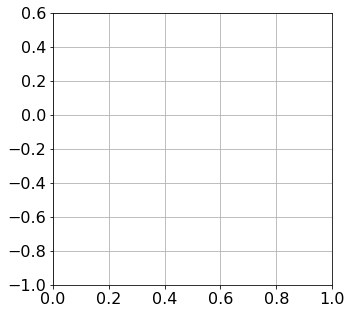

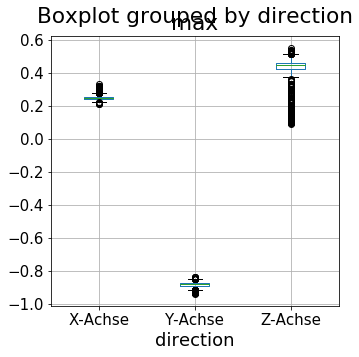

In [29]:
## Boxplot for Magnitude Variable
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['font.size']=18
#matplotlib.rcParams.update({'font.size': 22})
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

fig = plt.figure()
axes = plt.gca()

#fig, axes = plt.subplots(nrows=2, ncols=3) 
#axes = axes.flatten()
#plt.title('')
#plt.subplot(2, 2, 1)

#plt.title("")
plt.ylim(-1, 0.6)
df.boxplot(column=['max'], by='direction', fontsize=15, return_type='axes')

plt.show()

In [30]:
## Remove Outliers
from pandas.api.types import is_numeric_dtype
def remove_outlier(df):
    low = .05
    high = .95
    quant_df = df.quantile([low, high])
    for name in list(df.columns):
        if is_numeric_dtype(df[name]):
            df = df[(df[name] > quant_df.loc[low, name]) & (df[name] < quant_df.loc[high, name])]
    return df

In [31]:
dg = remove_outlier(df)

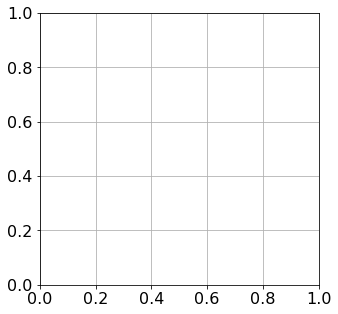

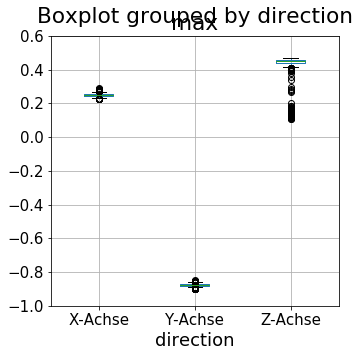

In [34]:
## Boxplot for Magnitude Variable
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,5)
plt.rcParams['font.size']=18
#matplotlib.rcParams.update({'font.size': 22})
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

fig = plt.figure()
axes = plt.gca()

#fig, axes = plt.subplots(nrows=2, ncols=3) 
#axes = axes.flatten()
#plt.title('')
#plt.subplot(2, 2, 1)

#plt.title("")
dg.boxplot(column=['max'], by='direction', fontsize=15, return_type='axes')
plt.ylim(-1, 0.6)

plt.show()

In [30]:
df.describe()

,min,max,avg,skewness,sd,kurtosis,peak-magnitude 1,peak-frequency 1,peak-magnitude 2,peak-frequency 2,peak-magnitude 3,peak-frequency 3,peak-magnitude 4,peak-frequency 4,peak-magnitude 5,peak-frequency 5
count,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000,23405.000000
mean,-0.640345,-0.202006,-0.405382,-0.051582,0.137934,-0.961100,2.106220,1.039046,0.537619,2.086937,0.284251,2.636098,0.174599,3.582148,0.110337,2.078122
std,0.478505,0.602952,0.522629,0.274267,0.130399,0.415003,2.126779,0.016255,0.217492,0.074305,0.112141,0.915234,0.053934,1.172628,0.054540,1.133676
min,-1.128000,-0.902000,-0.994345,-0.345471,0.047436,-1.517743,0.454476,0.968123,0.268831,0.977961,0.113446,0.915978,0.079126,0.873672,0.052844,0.836777
25%,-1.119000,-0.875000,-0.992873,-0.277854,0.061234,-1.308979,0.777901,1.041322,0.373001,2.093664,0.201681,2.938476,0.137186,3.157025,0.071189,0.977961
50%,-0.623000,0.241000,-0.007518,-0.171175,0.072739,-1.115563,1.066462,1.041322,0.444688,2.099174,0.263691,3.157025,0.162942,4.214876,0.088687,2.033058
75%,-0.015000,0.264000,0.103864,0.247973,0.076910,-0.532048,1.508328,1.046832,0.706071,2.099174,0.328452,3.157025,0.204457,4.214876,0.138634,3.099174
max,0.004000,0.466000,0.106545,0.684489,0.384623,-0.389966,7.617889,1.052342,1.215369,2.107438,0.684405,4.168388,0.398663,4.219467,0.299544,4.162284


In [27]:
#df.to_csv('/home/pooja/Documents/sva/projekten/klimaanlage/dataset/klima_preprocess_dataset.csv')

## Quality control of the control-dataset

In [27]:
import rpy2.rinterface

In [28]:
%load_ext rpy2.ipython
%R require(qcc)
%R require(tidyr)

/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: qcc

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:   __ _  ___ ___ 
 / _  |/ __/ __|  Quality Control Charts and 
| (_| | (_| (__   Statistical Process Control
 \__  |\___\___|
    |_|           version 2.7

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Type 'citation("qcc")' for citing this R package in publications.

  warnings.warn(x, RRuntimeWarning)
/usr/local/lib/python3.5/dist-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Loading required package: tidyr

  warnings.warn(x, RRuntimeWarning)


array([0], dtype=int32)

In [29]:
df = df.drop(['direction','timeofmeasurement'], axis=1)
df.shape

(23405, 16)

In [36]:
## lets take the subset of the dataset 
dg=df[1:2000]
dg.head()

,min,max,avg,skewness,sd,kurtosis,peak-magnitude 1,peak-frequency 1,peak-magnitude 2,peak-frequency 2,peak-magnitude 3,peak-frequency 3,peak-magnitude 4,peak-frequency 4,peak-magnitude 5,peak-frequency 5
10,-1.118,-0.870,-0.991100,-0.223253,0.061276,-0.407012,1.103429,1.049587,0.569323,2.107438,0.196212,3.165289,0.174342,4.214876,0.097093,2.033058
16,-1.123,-0.878,-0.993109,-0.266055,0.060822,-0.418919,0.922594,1.043388,0.414386,2.107438,0.246332,3.161157,0.172137,4.214876,0.081329,2.035124
25,-1.116,-0.884,-0.991627,-0.246274,0.059787,-0.405792,0.805007,1.041322,0.459905,2.099174,0.178535,3.157025,0.115610,4.214876,0.064277,2.033058
26,-0.605,0.454,0.005582,-0.320862,0.379815,-1.453830,6.190255,1.041322,0.840183,2.099174,0.437662,0.975207,0.177231,3.157025,0.177043,0.892562
34,-1.117,-0.882,-0.991518,-0.286811,0.061362,-0.441625,0.783737,1.046832,0.413282,2.093664,0.239335,3.154270,0.129855,4.214876,0.090591,2.024793


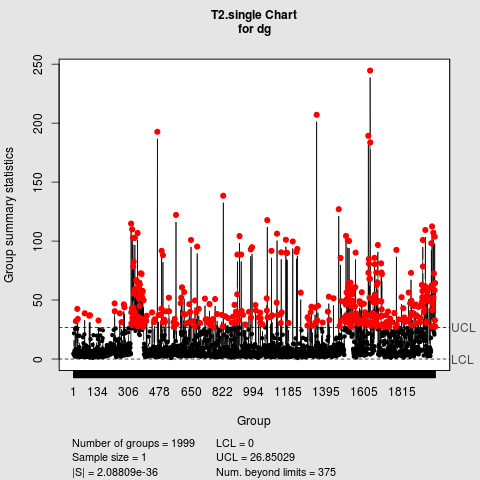

In [51]:
%%R -i dg
#data(pistonrings)
#diameter = with(pistonrings, qcc.groups(diameter, sample))
#qq = qcc(dg, type="xbar", nsigmas=3)
#q1 = qcc(diameter[1:25,], type="R", newdata=diameter[26:40,])
#q1 = mqcc(dg, type = "T2.single",nsigmas=3) #confidence.level = 0.999)
#qq = qcc(df, type="R", nsigmas=3) #nsigmas=3)

In [81]:
%%R -i df
#qmc = mqcc(df, type = "T2") #confidence.level = 0.999)

UsageError: Cell magic `%%R` not found.


## PixieDust
### trying out as learner in last IBM workshop, it is good for peeing into a small subset of dataset!!

In [36]:
#import pixiedust

In [37]:
#display(df)

In [33]:
df.head()

,timeofmeasurement,direction,min,max,avg,skewness,sd,kurtosis,peak-magnitude 1,peak-frequency 1,peak-magnitude 2,peak-frequency 2,peak-magnitude 3,peak-frequency 3,peak-magnitude 4,peak-frequency 4,peak-magnitude 5,peak-frequency 5
0,2018-09-03 02:07:40,X-Achse,0.007,0.252,0.105891,0.442092,0.071067,-1.055940,1.465425,1.046832,0.369512,2.102847,0.195093,4.214876,0.090899,3.158861,0.075437,1.120294
1,2018-09-03 02:07:40,Y-Achse,-1.119,-0.865,-0.992336,-0.239391,0.062193,-0.557088,1.090584,1.046832,0.630911,2.102847,0.289951,3.158861,0.169461,4.214876,0.065148,3.801653
2,2018-09-03 02:07:40,Z-Achse,-0.630,0.469,-0.004409,-0.277641,0.392088,-1.494529,8.393636,1.046832,1.147147,2.102847,0.406641,1.120294,0.388952,0.973370,0.284973,0.909091
3,2018-09-03 02:07:42,X-Achse,0.011,0.256,0.105609,0.455378,0.070860,-1.022672,1.089455,1.041322,0.265552,2.099174,0.124755,4.214876,0.074697,3.157025,0.066011,0.975207
4,2018-09-03 02:07:42,Y-Achse,-1.127,-0.877,-0.992964,-0.267911,0.060938,-0.361160,0.809997,1.041322,0.465886,2.099174,0.187011,3.157025,0.114472,4.214876,0.049296,2.016529


## Distribution analysis

In [31]:
df_x = df[df['direction']== "X-Achse"]
df_y = df[df['direction']=="Y-Achse"]
df_z = df[df['direction']=="Z-Achse"]

In [74]:
df_z.describe()

,min,max,avg,skewness,sd,kurtosis,peak-magnitude 1,peak-frequency 1,peak-magnitude 2,peak-frequency 2,peak-magnitude 3,peak-frequency 3,peak-magnitude 4,peak-frequency 4,peak-magnitude 5,peak-frequency 5
count,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000,5874.000000
mean,-0.577359,0.424821,-0.002521,-0.287023,0.351448,-1.436006,5.560674,1.036831,0.848256,2.077500,0.390378,1.203878,0.228753,1.938511,0.189623,1.830157
std,0.124953,0.084726,0.005772,0.076602,0.082083,0.195863,1.384645,0.018295,0.124981,0.112579,0.132765,0.631409,0.060952,1.124991,0.043671,1.044293
min,-0.682000,0.104000,-0.015364,-0.345436,0.050207,-1.517743,0.493145,0.968123,0.279335,0.977961,0.114101,0.915978,0.082632,0.873672,0.065606,0.836777
25%,-0.623000,0.439000,-0.007364,-0.321357,0.370485,-1.505941,5.711642,1.041322,0.777935,2.093664,0.283963,0.975207,0.189782,0.922865,0.160378,0.895317
50%,-0.612000,0.450000,-0.002973,-0.303111,0.375762,-1.493655,5.968446,1.041322,0.862420,2.099174,0.390665,0.975207,0.220782,1.167355,0.184656,1.184573
75%,-0.600000,0.457000,0.002300,-0.278235,0.379661,-1.474461,6.072960,1.043388,0.919193,2.099174,0.485875,0.991736,0.257138,3.157025,0.219129,3.157025
max,-0.093000,0.466000,0.012536,0.506969,0.384623,-0.438210,7.617889,1.051841,1.215369,2.107438,0.684405,4.166667,0.398663,4.214876,0.299544,4.152893


In [82]:
q = df_z["peak-frequency 1"].quantile(0.95)
q

1.04132231404959

In [84]:
7.5/1.2

6.25

Text(0,0.5,'average viberation')

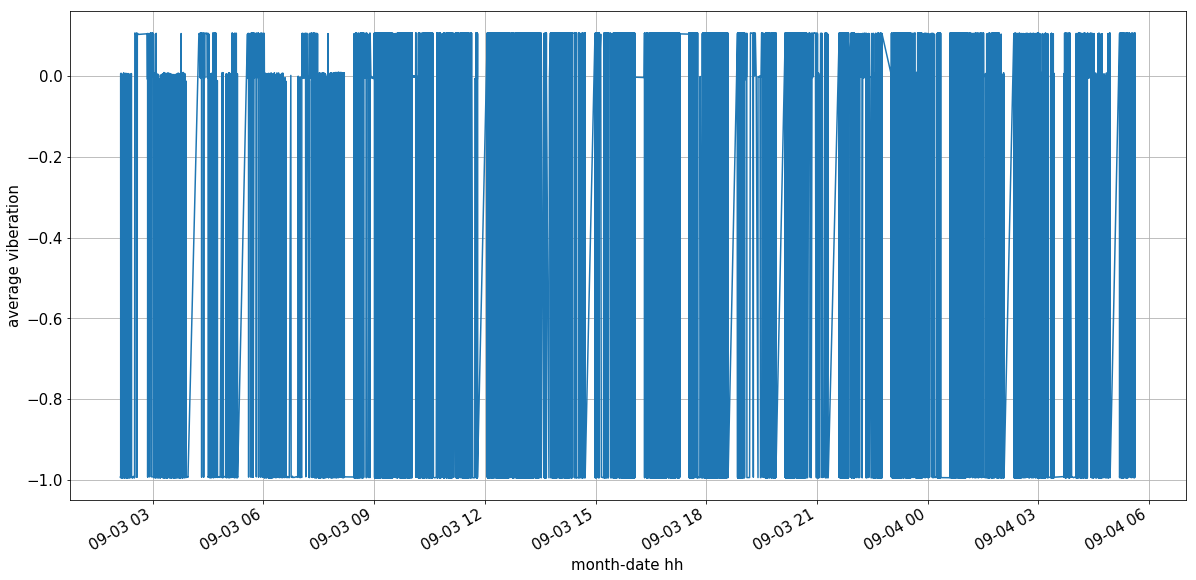

In [39]:
## Time Series plot
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['font.size']=15

fig, ax = plt.subplots()
ax.plot(df['timeofmeasurement'],df['avg'] )

# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the
# toolbar
ax.fmt_xdata = mdates.DateFormatter('%m')
ax.set_xlabel("month-date hh")  #('fig.autofmt_xdate fixes the labels')
ax.set_ylabel("average viberation")
#plt.show()


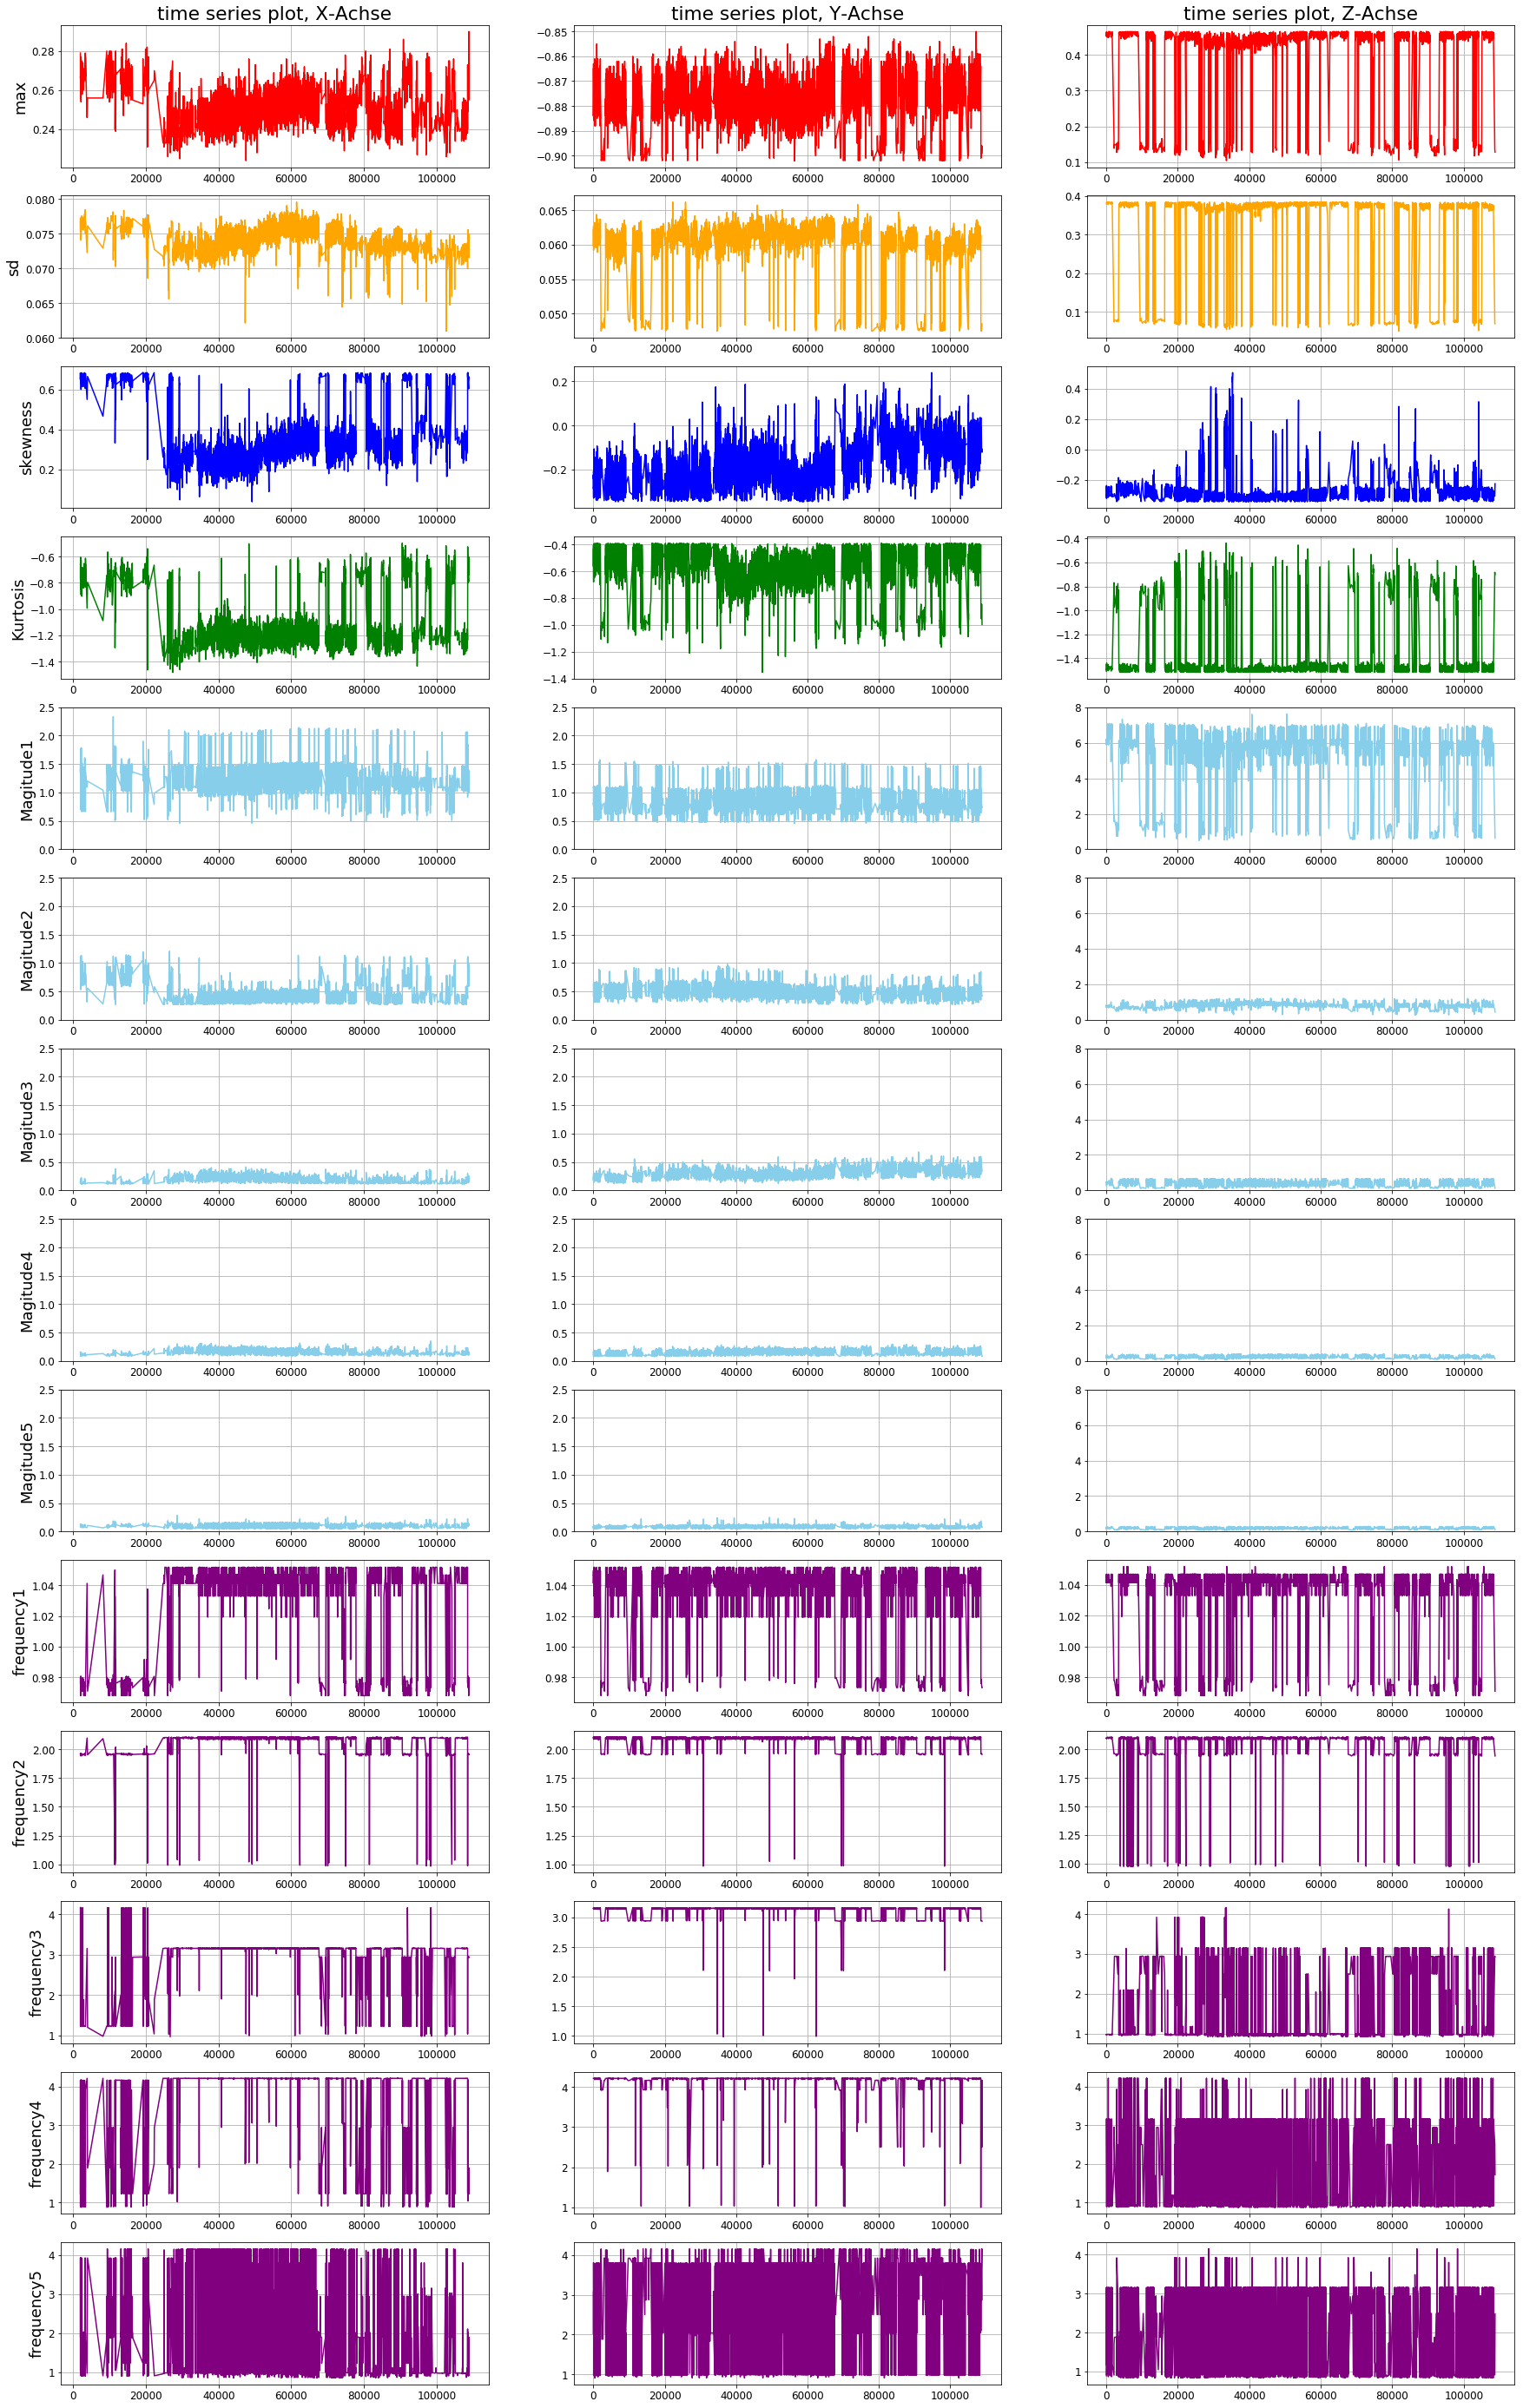

<Figure size 2160x3600 with 0 Axes>

In [35]:
## Time Series plot
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,50)
plt.rcParams['font.size']=18
#matplotlib.rcParams.update({'font.size': 22})

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 
fig = plt.figure()
ax = plt.gca()
nrow=14
ncol=3

maxmag = 8

## Maximum
plt.subplot(nrow, ncol, 1)
plt.plot(df_x.index.values, df_x['max'], color='red')
plt.title('time series plot, X-Achse')
plt.ylabel('max')

plt.subplot(nrow, ncol, 2)
plt.plot(df_y.index.values, df_y['max'], color='red')
plt.title('time series plot, Y-Achse')

plt.subplot(nrow, ncol, 3)
plt.plot(df_z.index.values, df_z['max'], color='red')
plt.title('time series plot, Z-Achse')

## sd
plt.subplot(nrow, ncol, 4)
plt.plot(df_x.index.values, df_x['sd'], color='orange')
plt.ylabel('sd')

plt.subplot(nrow, ncol, 5)
plt.plot(df_y.index.values, df_y['sd'], color='orange')

plt.subplot(nrow, ncol, 6)
plt.plot(df_z.index.values, df_z['sd'], color='orange')


## skewness
plt.subplot(nrow, ncol, 7)
plt.plot(df_x.index.values, df_x['skewness'], color='blue')
plt.ylabel('skewness')

plt.subplot(nrow, ncol, 8)
plt.plot(df_y.index.values, df_y['skewness'], color='blue')

plt.subplot(nrow, ncol, 9)
plt.plot(df_z.index.values, df_z['skewness'], color='blue')

## Kurtosis
plt.subplot(nrow, ncol, 10)
plt.plot(df_x.index.values, df_x['kurtosis'], color='green')
plt.ylabel('Kurtosis')

plt.subplot(nrow, ncol, 11)
plt.plot(df_y.index.values, df_y['kurtosis'], color='green')

plt.subplot(nrow, ncol, 12)
plt.plot(df_z.index.values, df_z['kurtosis'], color='green')


## Magnitude 1
plt.subplot(nrow, ncol, 13)
plt.plot(df_x.index.values, df_x['peak-magnitude 1'], color='skyblue')
plt.ylabel('Magitude1')
plt.ylim(0,2.5)

plt.subplot(nrow, ncol, 14)
plt.plot(df_y.index.values, df_y['peak-magnitude 1'], color='skyblue')
plt.ylim(0,2.5)

plt.subplot(nrow, ncol, 15)
plt.plot(df_z.index.values, df_z['peak-magnitude 1'], color='skyblue')
plt.ylim(0,maxmag)

## Magnitude 2
plt.subplot(nrow, ncol, 16)
plt.plot(df_x.index.values, df_x['peak-magnitude 2'], color='skyblue')
plt.ylabel('Magitude2')
plt.ylim(0,2.5)

plt.subplot(nrow, ncol, 17)
plt.plot(df_y.index.values, df_y['peak-magnitude 2'], color='skyblue')
plt.ylim(0,2.5)

plt.subplot(nrow, ncol, 18)
plt.plot(df_z.index.values, df_z['peak-magnitude 2'], color='skyblue')
plt.ylim(0,maxmag)

## Magnitude 3
plt.subplot(nrow, ncol, 19)
plt.plot(df_x.index.values, df_x['peak-magnitude 3'], color='skyblue')
plt.ylabel('Magitude3')
plt.ylim(0,2.5)

plt.subplot(nrow, ncol, 20)
plt.plot(df_y.index.values, df_y['peak-magnitude 3'], color='skyblue')
plt.ylim(0,2.5)

plt.subplot(nrow, ncol, 21)
plt.plot(df_z.index.values, df_z['peak-magnitude 3'], color='skyblue')
plt.ylim(0,maxmag)


## Magnitude 4
plt.subplot(nrow, ncol, 22)
plt.plot(df_x.index.values, df_x['peak-magnitude 4'], color='skyblue')
plt.ylabel('Magitude4')
plt.ylim(0,2.5)

plt.subplot(nrow, ncol, 23)
plt.plot(df_y.index.values, df_y['peak-magnitude 4'], color='skyblue')
plt.ylim(0,2.5)

plt.subplot(nrow, ncol, 24)
plt.plot(df_z.index.values, df_z['peak-magnitude 4'], color='skyblue')
plt.ylim(0,maxmag)


## Magnitude 5
plt.subplot(nrow, ncol, 25)
plt.plot(df_x.index.values, df_x['peak-magnitude 5'], color='skyblue')
plt.ylabel('Magitude5')
plt.ylim(0,2.5)

plt.subplot(nrow, ncol, 26)
plt.plot(df_y.index.values, df_y['peak-magnitude 5'], color='skyblue')
plt.ylim(0,2.5)

plt.subplot(nrow, ncol, 27)
plt.plot(df_z.index.values, df_z['peak-magnitude 5'], color='skyblue')
plt.ylim(0,maxmag)

## frequency 1
plt.subplot(nrow, ncol, 28)
plt.plot(df_x.index.values, df_x['peak-frequency 1'], color='purple')
plt.ylabel('frequency1')
#plt.ylim(0,3)

plt.subplot(nrow, ncol, 29)
plt.plot(df_y.index.values, df_y['peak-frequency 1'], color='purple')
#plt.ylim(0,3)

plt.subplot(nrow, ncol, 30)
plt.plot(df_z.index.values, df_z['peak-frequency 1'], color='purple')
#plt.ylim(0,6)

## frequency 2
plt.subplot(nrow, ncol, 31)
plt.plot(df_x.index.values, df_x['peak-frequency 2'], color='purple')
plt.ylabel('frequency2')
#plt.ylim(0,3)

plt.subplot(nrow, ncol, 32)
plt.plot(df_y.index.values, df_y['peak-frequency 2'], color='purple')
#plt.ylim(0,3)

plt.subplot(nrow, ncol, 33)
plt.plot(df_z.index.values, df_z['peak-frequency 2'], color='purple')
#plt.ylim(0,17.5)

## frequency 3
plt.subplot(nrow, ncol, 34)
plt.plot(df_x.index.values, df_x['peak-frequency 3'], color='purple')
plt.ylabel('frequency3')
#plt.ylim(0,3)

plt.subplot(nrow, ncol, 35)
plt.plot(df_y.index.values, df_y['peak-frequency 3'], color='purple')
#plt.ylim(0,3)

plt.subplot(nrow, ncol, 36)
plt.plot(df_z.index.values, df_z['peak-frequency 3'], color='purple')
#plt.ylim(0,17.5)

## frequency 4
plt.subplot(nrow, ncol, 37)
plt.plot(df_x.index.values, df_x['peak-frequency 4'], color='purple')
plt.ylabel('frequency4')
#plt.ylim(0,3)

plt.subplot(nrow, ncol, 38)
plt.plot(df_y.index.values, df_y['peak-frequency 4'], color='purple')
#plt.ylim(0,3)

plt.subplot(nrow, ncol, 39)
plt.plot(df_z.index.values, df_z['peak-frequency 4'], color='purple')
#plt.ylim(0,17.5)

## frequency 5
plt.subplot(nrow, ncol, 40)
plt.plot(df_x.index.values, df_x['peak-frequency 5'], color='purple')
plt.ylabel('frequency5')
#plt.ylim(0,3)

plt.subplot(nrow, ncol, 41)
plt.plot(df_y.index.values, df_y['peak-frequency 5'], color='purple')
#plt.ylim(0,3)

plt.subplot(nrow, ncol, 42)
plt.plot(df_z.index.values, df_z['peak-frequency 5'], color='purple')
#plt.ylim(0,17.5)

plt.show()
fig = plt.gcf()
fig.set_size_inches(30, 50)
#fig.savefig('timeseries_featurePlots.eps', formats='eps',dpi=1000)
#fig.savefig('timeseries_featurePlots.png', formats='png',dpi=1000)

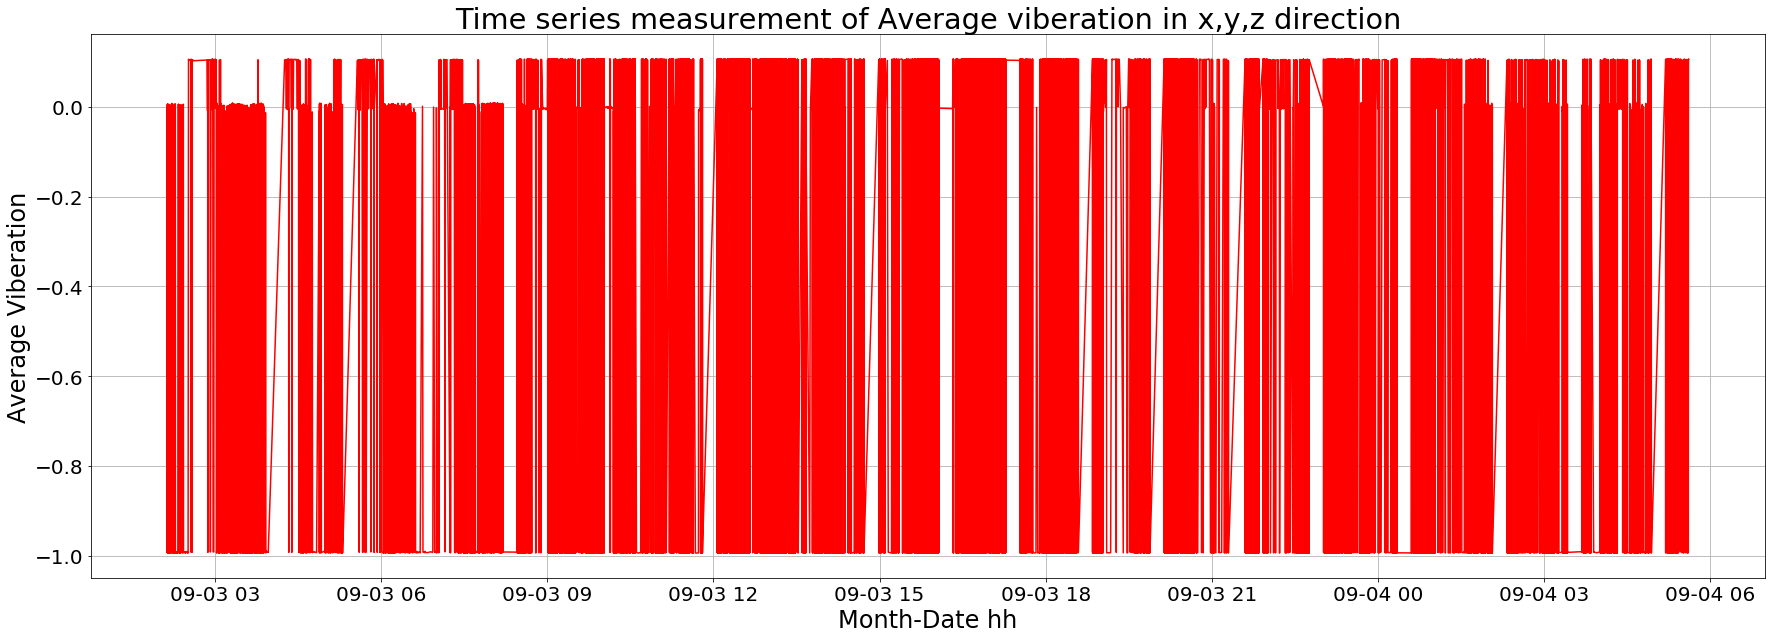

<Figure size 2160x720 with 0 Axes>

In [36]:
## average viberation measurement > Time Series plot
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams['font.size']=24
#matplotlib.rcParams.update({'font.size': 22})

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 


plt.plot(df['timeofmeasurement'], df['avg'], color='red')
plt.title('Time series measurement of Average viberation in x,y,z direction')
#plt.yticks(np.arange(-1, 1, step=0.4))
plt.ylabel('Average Viberation')
plt.xlabel("Month-Date hh")
plt.grid(True)

plt.show()
fig = plt.gcf()
fig.savefig('timeseries_avg.png', dpi=100)

In [38]:
df2 = df.copy(deep=True)
header=list(df2.head(0))
print(header)

['timeofmeasurement', 'direction', 'min', 'max', 'avg', 'skewness', 'sd', 'kurtosis', 'peak-magnitude 1', 'peak-frequency 1', 'peak-magnitude 2', 'peak-frequency 2', 'peak-magnitude 3', 'peak-frequency 3', 'peak-magnitude 4', 'peak-frequency 4', 'peak-magnitude 5', 'peak-frequency 5']


In [39]:
df2=df2.drop(['direction', 'min', 'max', 'avg', 'skewness', 'sd', 'kurtosis','peak-frequency 1','peak-frequency 2', 'peak-frequency 3','peak-frequency 4','peak-frequency 5'], axis=1)
df2.head()
#df2=df2.set_index('timeofmeasurement')

,timeofmeasurement,peak-magnitude 1,peak-magnitude 2,peak-magnitude 3,peak-magnitude 4,peak-magnitude 5
1,2018-09-03 02:07:40,1.090584,0.630911,0.289951,0.169461,0.065148
10,2018-09-03 02:07:48,1.103429,0.569323,0.196212,0.174342,0.097093
16,2018-09-03 02:07:58,0.922594,0.414386,0.246332,0.172137,0.081329
25,2018-09-03 02:08:06,0.805007,0.459905,0.178535,0.115610,0.064277
26,2018-09-03 02:08:06,6.190255,0.840183,0.437662,0.177231,0.177043


In [43]:
colNames_df2= ["time-of-measurement","peak-magnitude 1","peak-magnitude 2","peak-magnitude 3","peak-magnitude 4","peak-magnitude 5", ]
df2.columns = colNames_df2

In [44]:
df2=df2.set_index("time-of-measurement")
df2.head()

,peak-magnitude 1,peak-magnitude 2,peak-magnitude 3,peak-magnitude 4,peak-magnitude 5
time-of-measurement,,,,,
2018-09-03 02:07:40,1.090584,0.630911,0.289951,0.169461,0.065148
2018-09-03 02:07:48,1.103429,0.569323,0.196212,0.174342,0.097093
2018-09-03 02:07:58,0.922594,0.414386,0.246332,0.172137,0.081329
2018-09-03 02:08:06,0.805007,0.459905,0.178535,0.115610,0.064277
2018-09-03 02:08:06,6.190255,0.840183,0.437662,0.177231,0.177043


<Figure size 2160x1440 with 0 Axes>

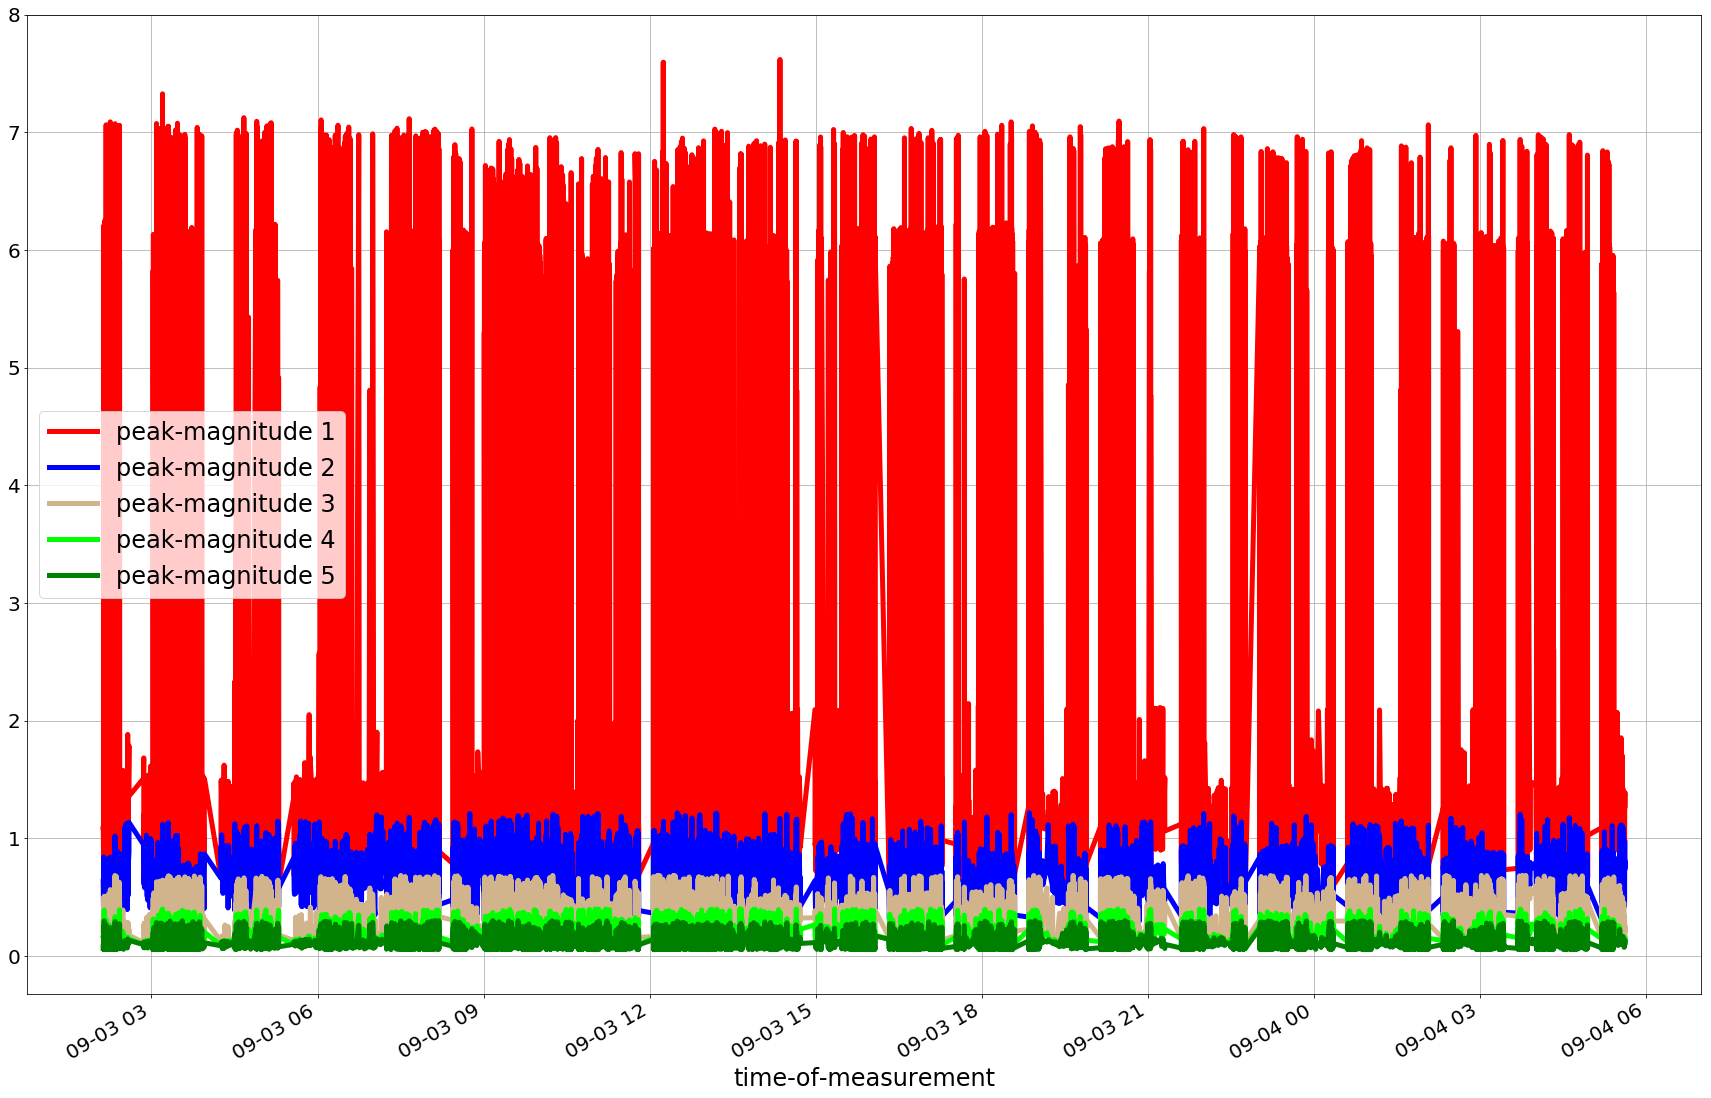

In [45]:
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams['font.size']=24

#df2 = df2.cumsum()
plt.figure(); df2.plot(color=['red','blue','tan','lime','green'],  linewidth=5);

<Figure size 1440x720 with 0 Axes>

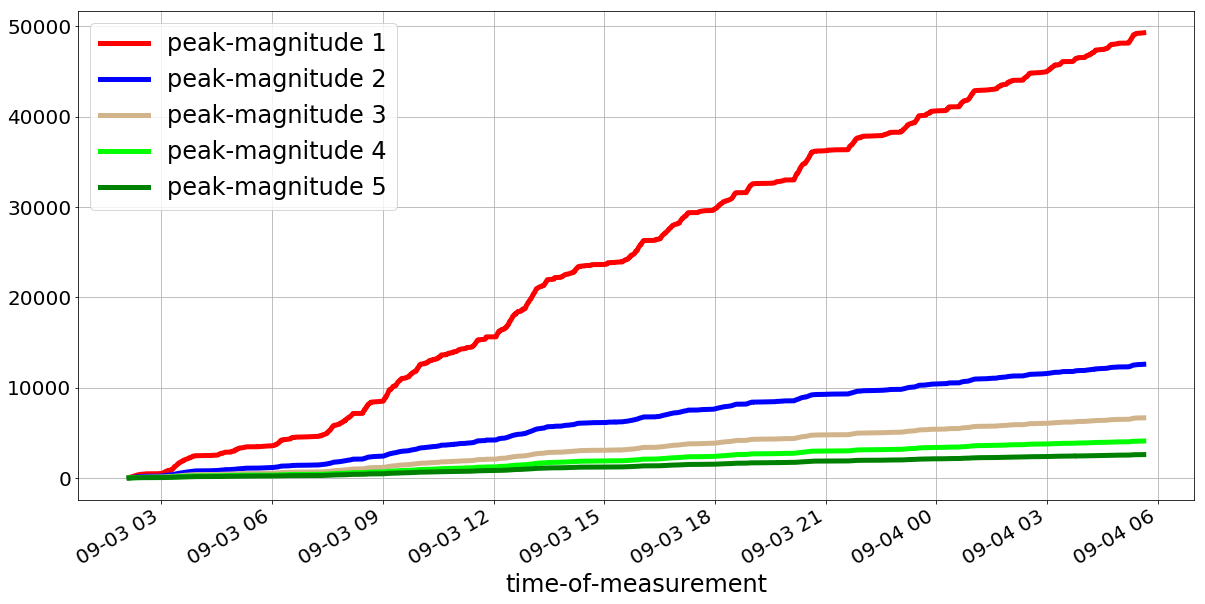

In [46]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['font.size']=24

df3 = df2.cumsum()
plt.figure(); df3.plot(color=['red','blue','tan','lime','green'],  linewidth=5);

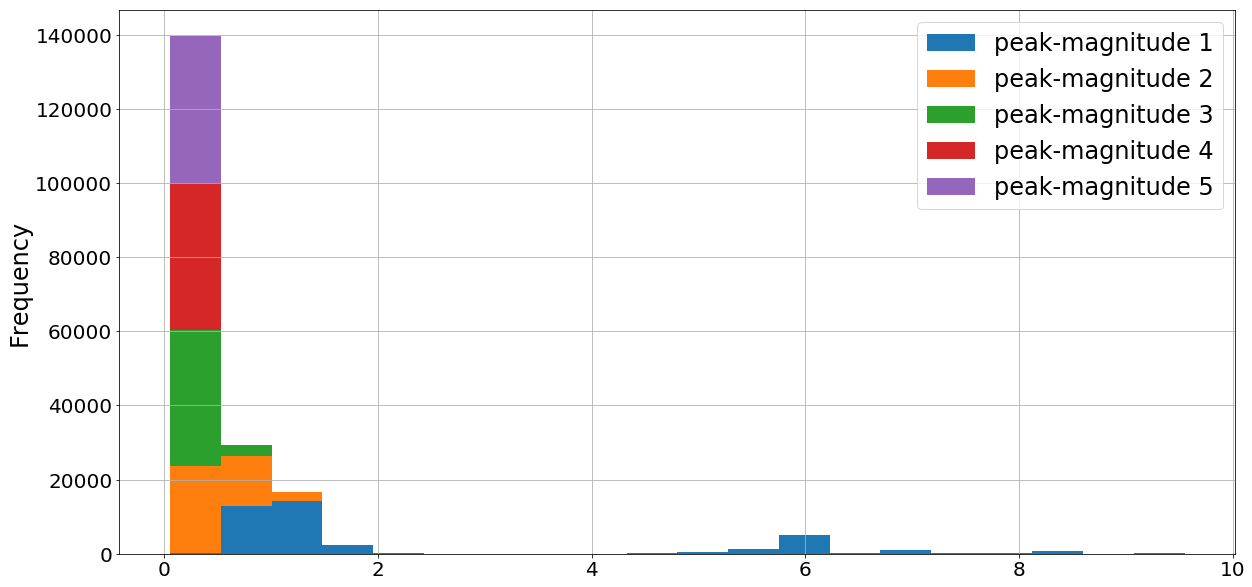

In [92]:
df2.plot.hist(stacked=True, bins=20)

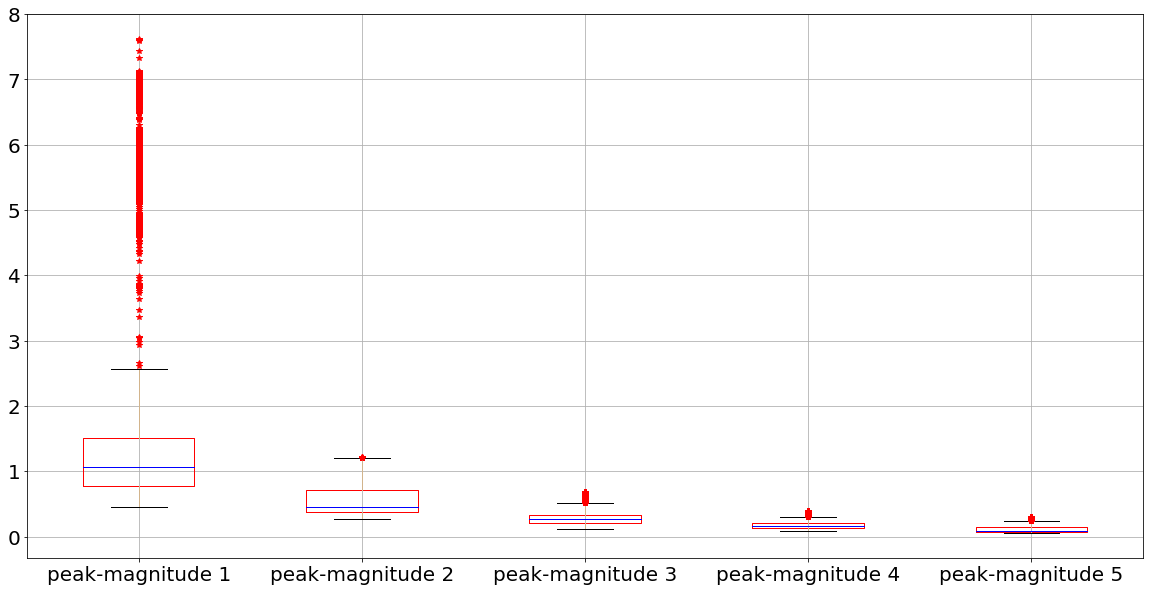

In [47]:
plt.rcParams['font.size']=24

ncolor = dict(boxes='red', whiskers='tan',medians='blue', caps='black')
df2.plot.box(color=ncolor, sym='r*')

In [95]:
df3= df.copy(deep=True)
name=list(df3.head(0))
name

['timeofmeasurement',
 'direction',
 'min',
 'max',
 'avg',
 'skewness',
 'sd',
 'kurtosis',
 'peak-magnitude 1',
 'peak-frequency 1',
 'peak-magnitude 2',
 'peak-frequency 2',
 'peak-magnitude 3',
 'peak-frequency 3',
 'peak-magnitude 4',
 'peak-frequency 4',
 'peak-magnitude 5',
 'peak-frequency 5']

In [96]:
df3=df3.drop(['direction',
 'min',
 'max',
 'avg',
 'skewness',
 'sd',
 'kurtosis',
 'peak-magnitude 1','peak-magnitude 2','peak-magnitude 3','peak-magnitude 4','peak-magnitude 5'
             ], axis=1)
df3.head()

,timeofmeasurement,peak-frequency 1,peak-frequency 2,peak-frequency 3,peak-frequency 4,peak-frequency 5
0,2018-09-03 02:07:40,1.046832,2.102847,4.214876,3.158861,1.120294
1,2018-09-03 02:07:40,1.046832,2.102847,3.158861,4.214876,3.801653
6,2018-09-03 02:07:46,1.038961,2.101535,4.214876,0.968123,3.152302
7,2018-09-03 02:07:46,1.038961,2.101535,3.152302,4.214876,0.968123
10,2018-09-03 02:07:48,1.049587,2.107438,3.165289,4.214876,2.033058


In [97]:
df3=df3.set_index('timeofmeasurement')
df3.head()

,peak-frequency 1,peak-frequency 2,peak-frequency 3,peak-frequency 4,peak-frequency 5
timeofmeasurement,,,,,
2018-09-03 02:07:40,1.046832,2.102847,4.214876,3.158861,1.120294
2018-09-03 02:07:40,1.046832,2.102847,3.158861,4.214876,3.801653
2018-09-03 02:07:46,1.038961,2.101535,4.214876,0.968123,3.152302
2018-09-03 02:07:46,1.038961,2.101535,3.152302,4.214876,0.968123
2018-09-03 02:07:48,1.049587,2.107438,3.165289,4.214876,2.033058


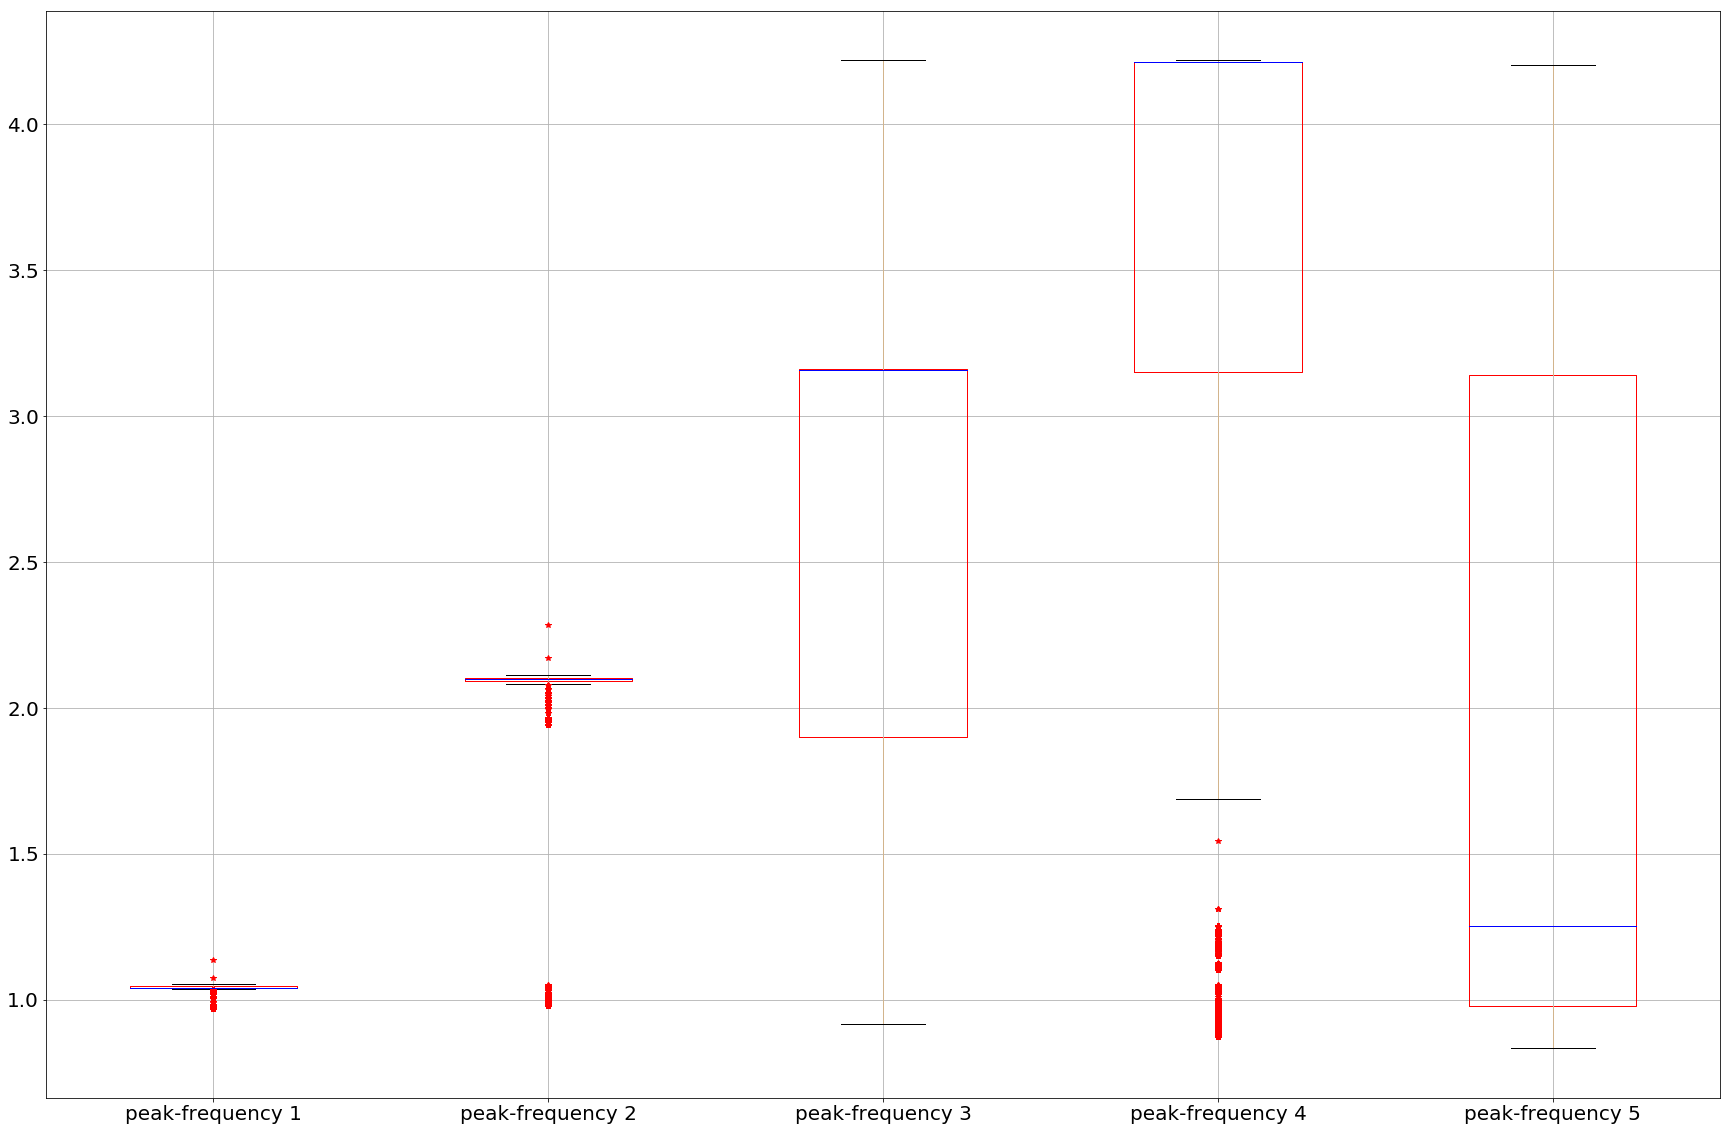

In [98]:
plt.rcParams['font.size']=24

ncolor = dict(boxes='red', whiskers='tan',medians='blue', caps='black')
df3.plot.box(color=ncolor, sym='r*')

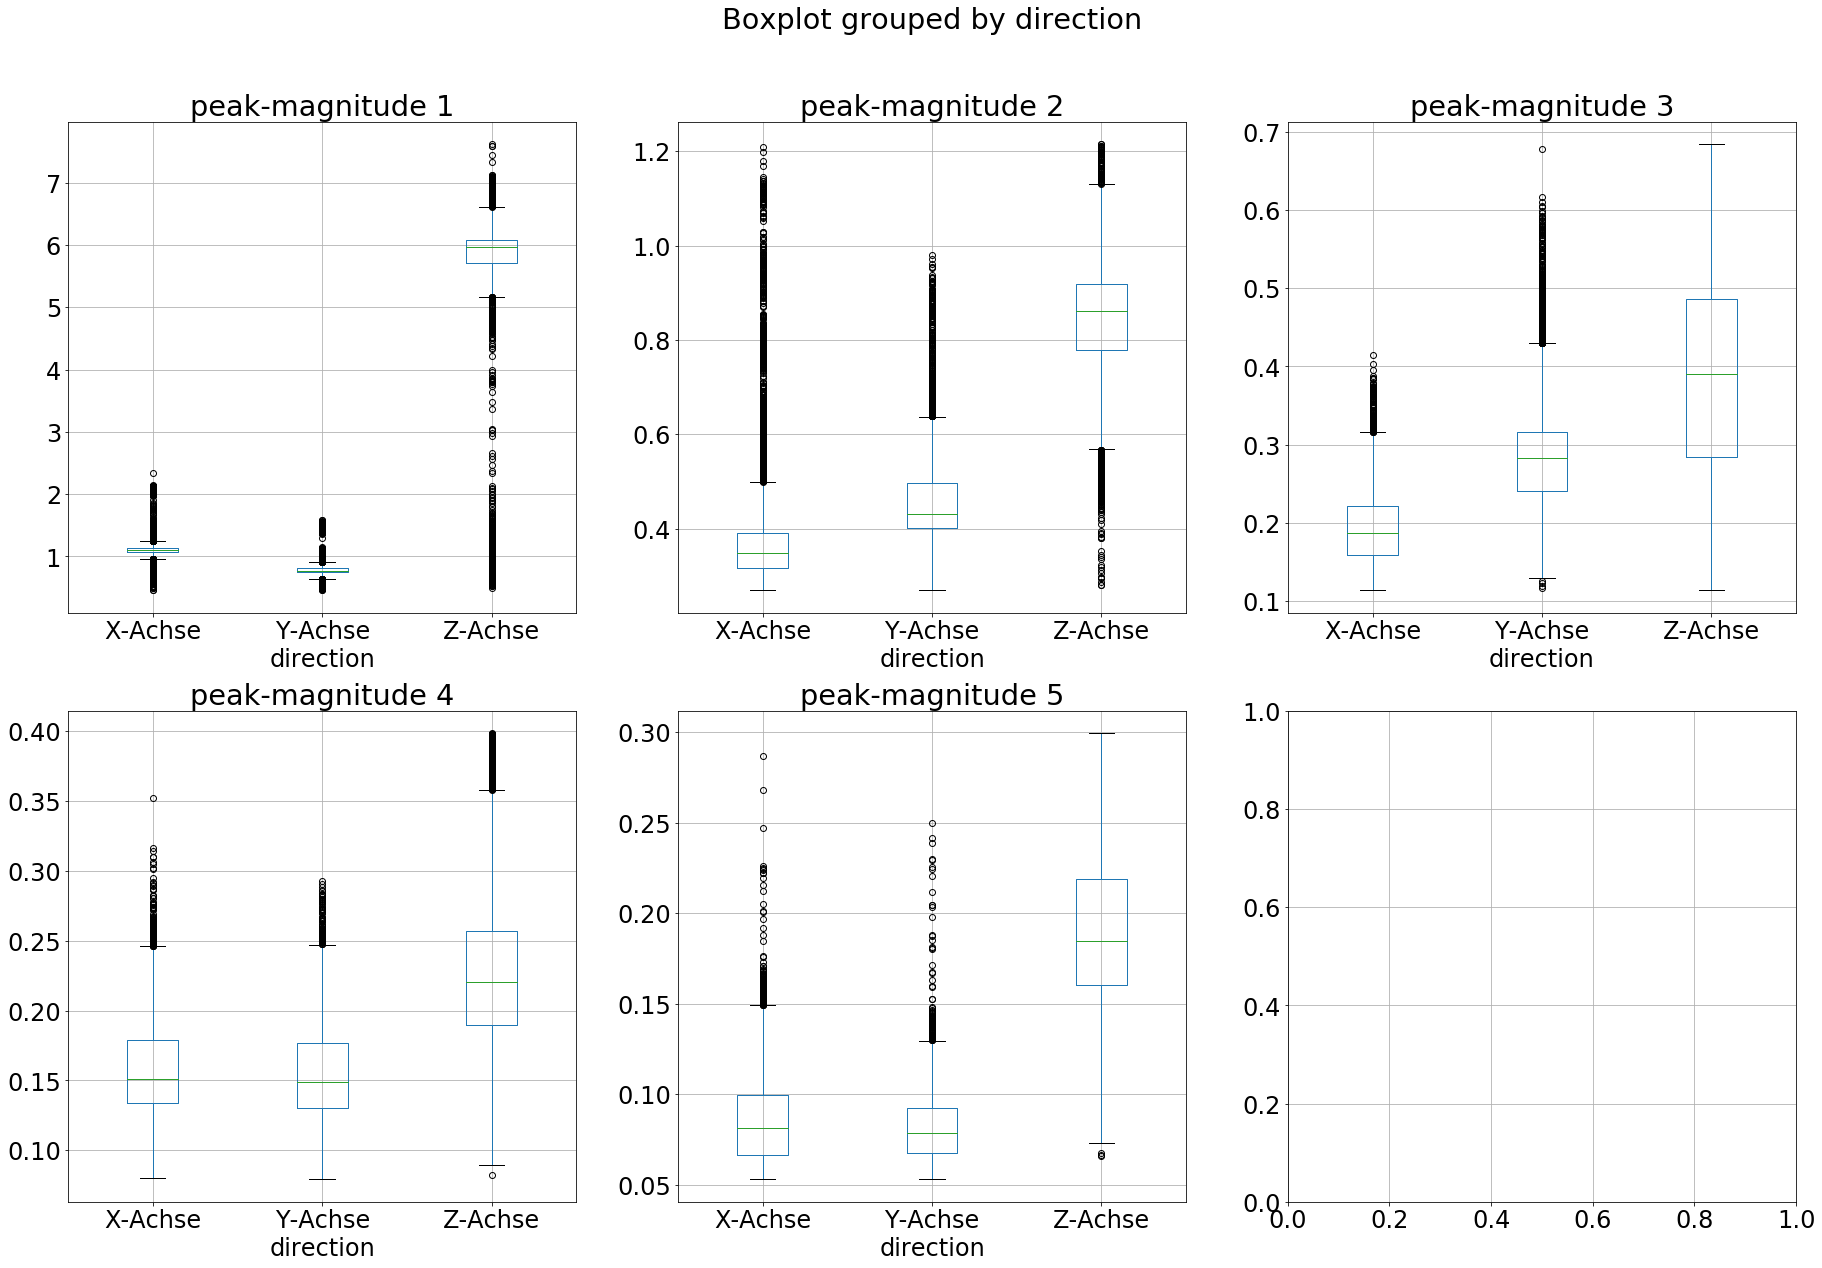

In [48]:
## Boxplot for Magnitude Variable
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams['font.size']=24
#matplotlib.rcParams.update({'font.size': 22})
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24) 

fig, axes = plt.subplots(nrows=2, ncols=3) 
axes = axes.flatten()
plt.title('')
#plt.subplot(2, 2, 1)
df.boxplot(column=['peak-magnitude 1'], by='direction', ax=axes[0])
df.boxplot(column=['peak-magnitude 2'], by='direction', ax=axes[1])
df.boxplot(column=['peak-magnitude 3'], by='direction', ax=axes[2])
df.boxplot(column=['peak-magnitude 4'], by='direction', ax=axes[3])
df.boxplot(column=['peak-magnitude 5'], by='direction', ax=axes[4])

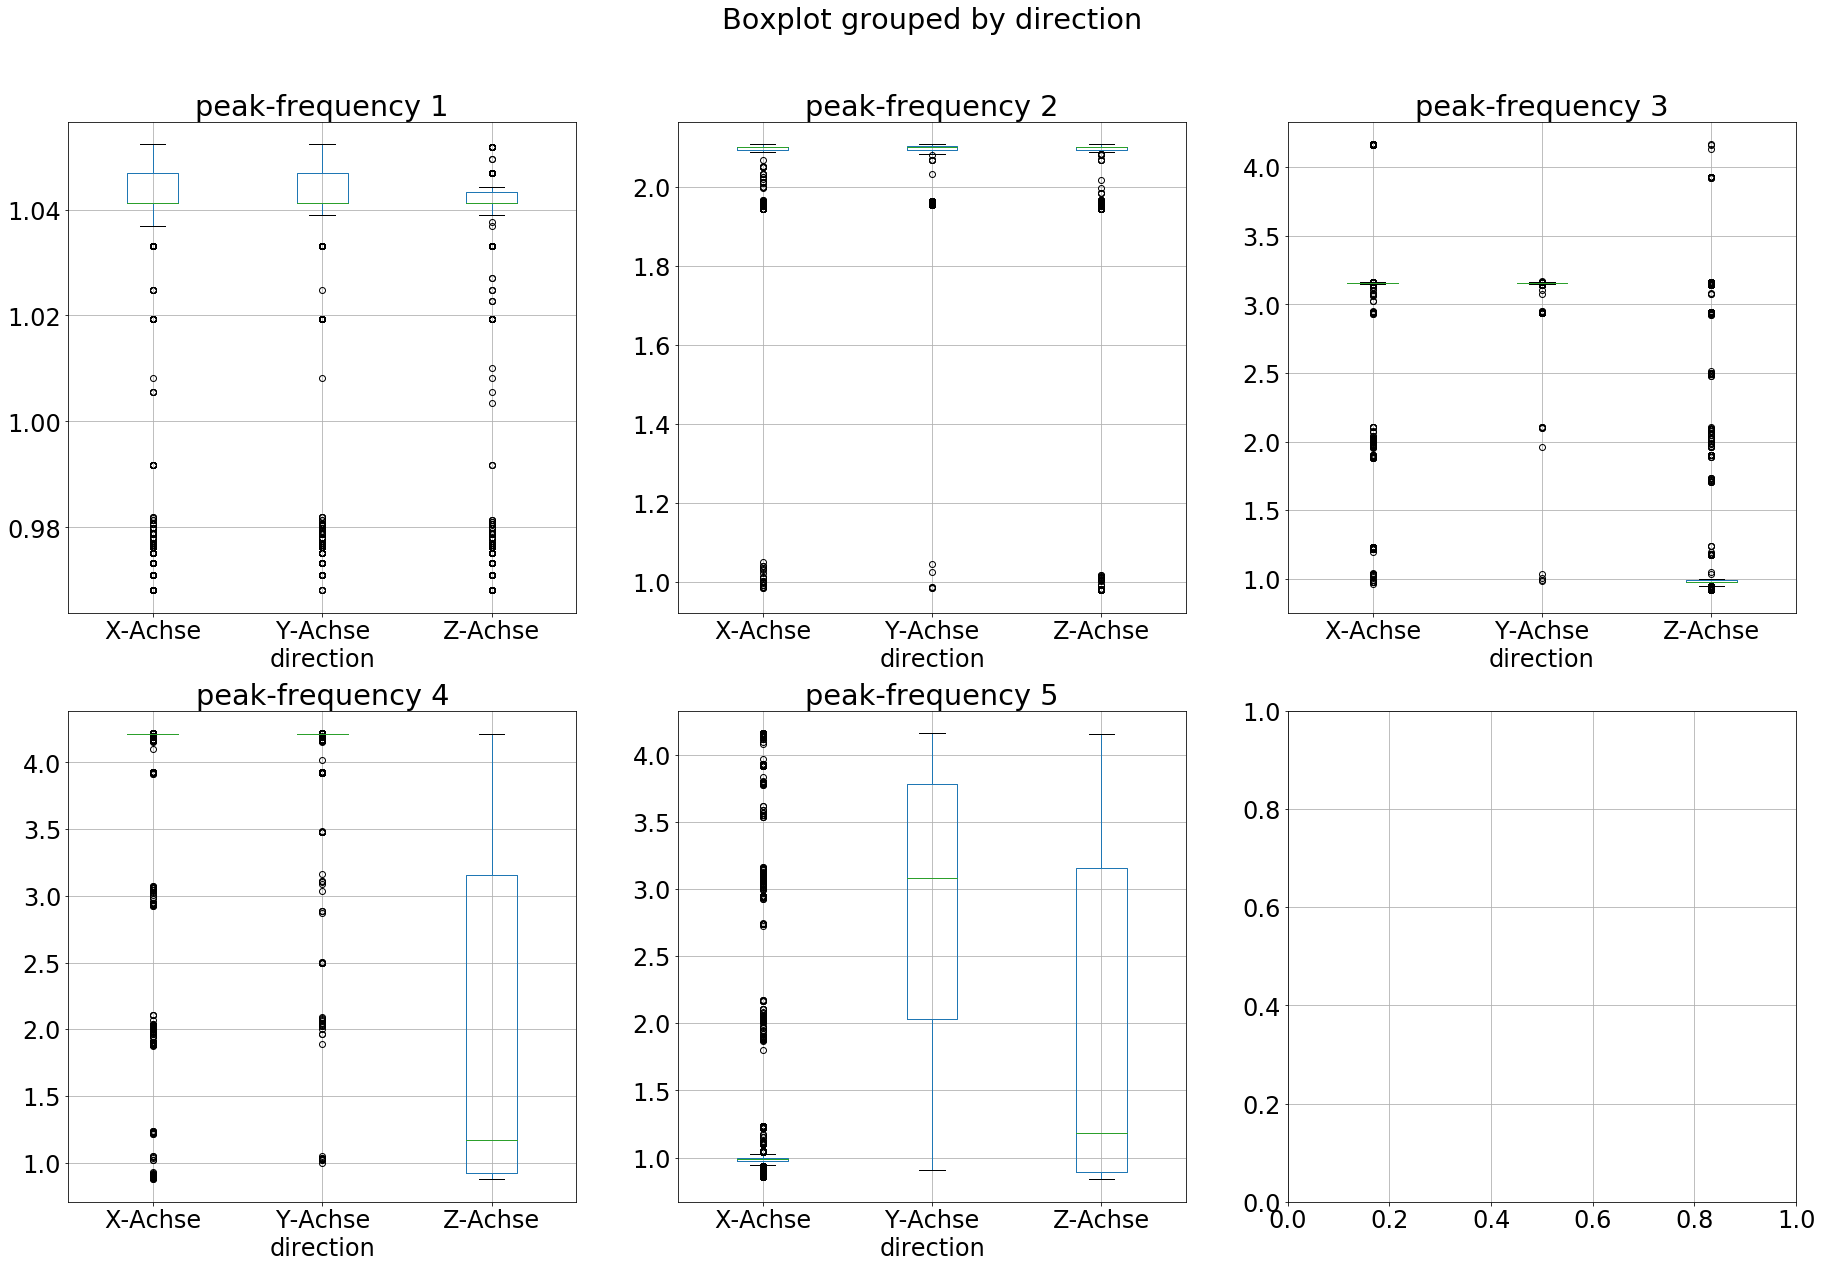

In [49]:
## Boxplot for Magnitude Variable
import matplotlib 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,20)
plt.rcParams['font.size']=24
#matplotlib.rcParams.update({'font.size': 22})
matplotlib.rc('xtick', labelsize=24) 
matplotlib.rc('ytick', labelsize=24) 

fig, axes = plt.subplots(nrows=2, ncols=3) 
axes = axes.flatten()
plt.title('')
#plt.subplot(2, 2, 1)
df.boxplot(column=['peak-frequency 1'], by='direction', ax=axes[0])
df.boxplot(column=['peak-frequency 2'], by='direction', ax=axes[1])
df.boxplot(column=['peak-frequency 3'], by='direction', ax=axes[2])
df.boxplot(column=['peak-frequency 4'], by='direction', ax=axes[3])
df.boxplot(column=['peak-frequency 5'], by='direction', ax=axes[4])

In [102]:
df.head()

,timeofmeasurement,direction,min,max,avg,skewness,sd,kurtosis,peak-magnitude 1,peak-frequency 1,peak-magnitude 2,peak-frequency 2,peak-magnitude 3,peak-frequency 3,peak-magnitude 4,peak-frequency 4,peak-magnitude 5,peak-frequency 5
0,2018-09-03 02:07:40,X-direction,0.007,0.252,0.105891,0.442092,0.071067,-1.055940,1.465425,1.046832,0.369512,2.102847,0.195093,4.214876,0.090899,3.158861,0.075437,1.120294
1,2018-09-03 02:07:40,Y-direction,-1.119,-0.865,-0.992336,-0.239391,0.062193,-0.557088,1.090584,1.046832,0.630911,2.102847,0.289951,3.158861,0.169461,4.214876,0.065148,3.801653
6,2018-09-03 02:07:46,X-direction,0.000,0.246,0.103318,0.438207,0.070745,-1.112039,0.854443,1.038961,0.327344,2.101535,0.180940,4.214876,0.081440,0.968123,0.066603,3.152302
7,2018-09-03 02:07:46,Y-direction,-1.124,-0.870,-0.993009,-0.222441,0.062377,-0.365424,0.640819,1.038961,0.581226,2.101535,0.181652,3.152302,0.162496,4.214876,0.072640,0.968123
10,2018-09-03 02:07:48,Y-direction,-1.118,-0.870,-0.991100,-0.223253,0.061276,-0.407012,1.103429,1.049587,0.569323,2.107438,0.196212,3.165289,0.174342,4.214876,0.097093,2.033058


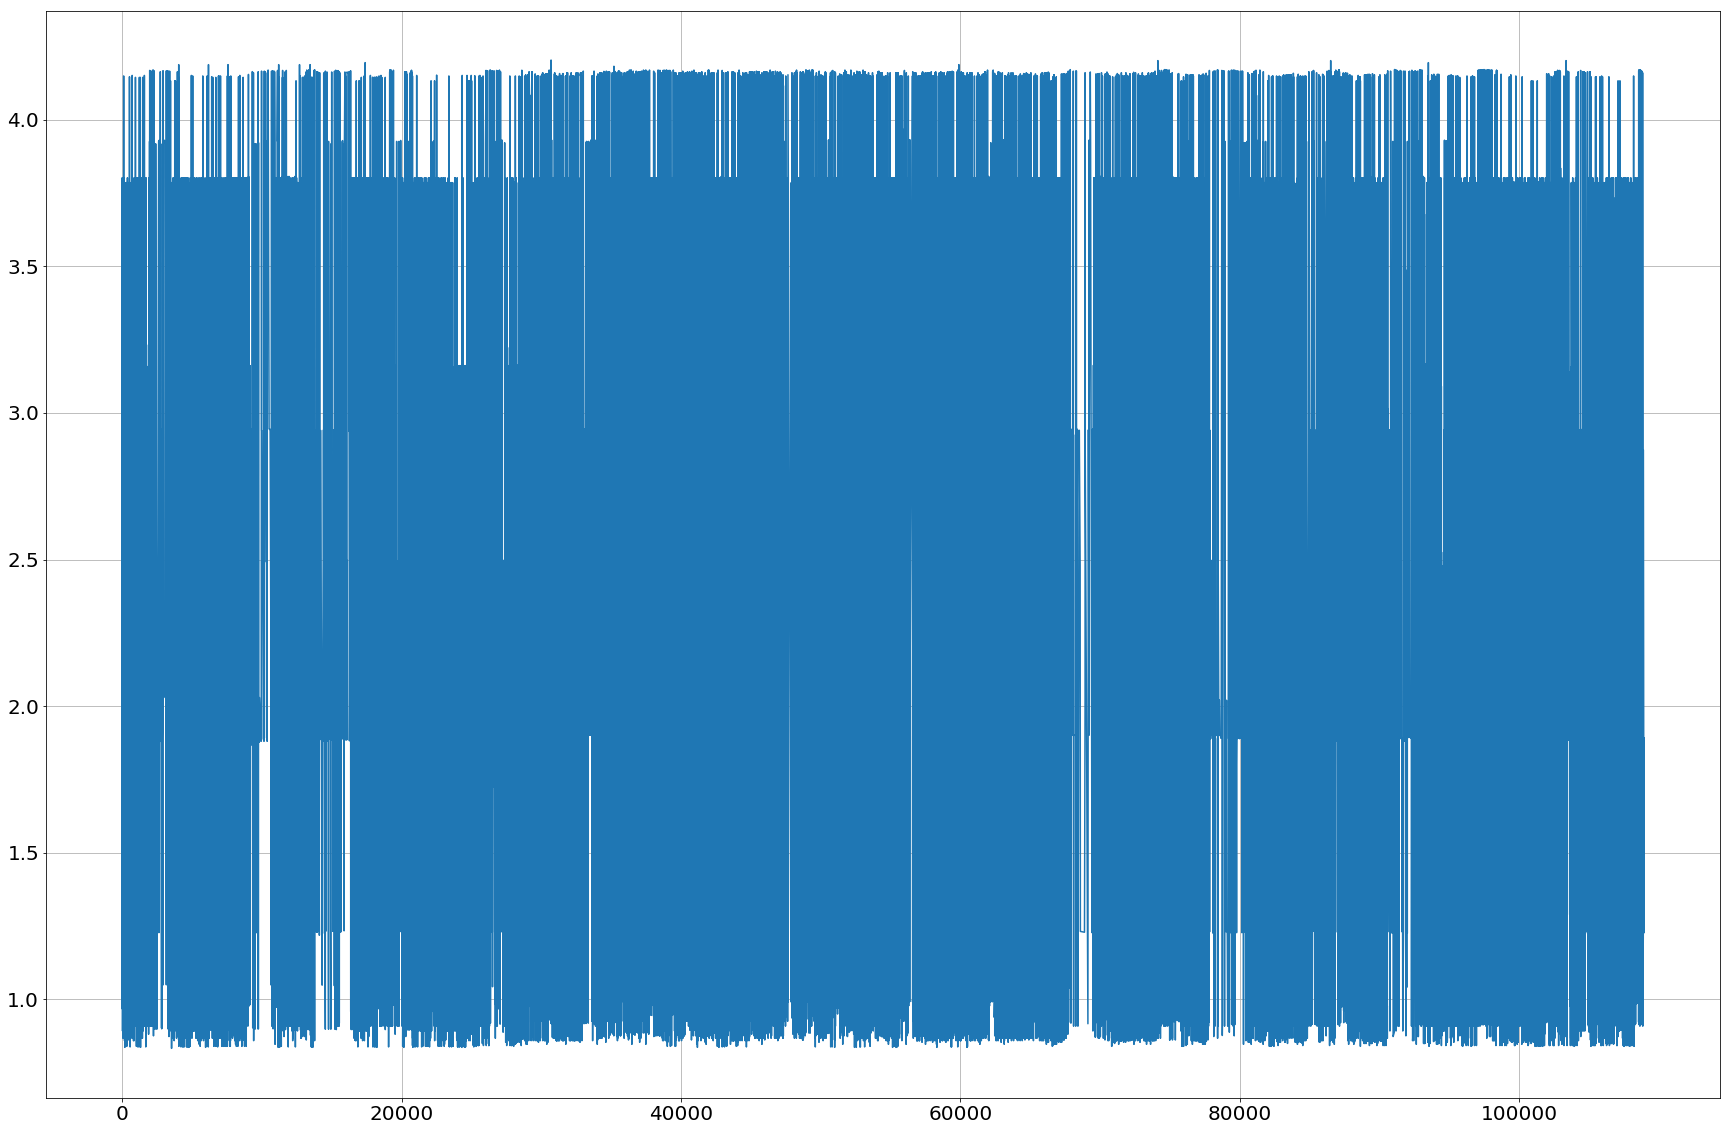

In [107]:
plt.figure(); plt.plot(df["peak-frequency 5"])

In [ ]:
#Stack the Histograms
plt.rcParams["figure.figsize"] = (30,20)

nbins = np.arange(-0.1, 18, step=0.5)

plt.figure()
plt.hist([df["m1"],df["m2"],df["m3"],df["m4"],df["m5"]],histtype='stepfilled',bins=nbins,stacked=True, density=False);
plt.legend(["m1",  "m2", "m3","m4","m5"])
plt.show()

In [ ]:
## Plotting histograms for the Magnitude
#fig, axes = plt.subplots(nrows=2, ncols=2)
#ax0, ax1, ax2, ax3 = axes.flatten()

#colors = ['red', 'tan', 'lime']
#hist(x, n_bins, normed=1, histtype='bar', color=colors, label=colors)
#legend(prop={'size': 10})
#set_title('bars with legend')

plt.rcParams["figure.figsize"] = (30,20)
nbins = np.arange(-0.1, 18, step=0.5)
nTra = 1
plotname=["m1", "m2","m3","m4","m5"]
for var in plotname:
    df[var].hist(label=var, density=False, histtype='bar', bins=nbins, alpha=nTra, stacked=False, cumulative=False)
    
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
## Plotting histograms for the Frequncy variables
plt.rcParams["figure.figsize"] = (30,20)
nbins = np.arange(-0.1, 18, step=0.5)
nTra = 1
plotname=["f1", "f2","f3","f4","f5"]
for var in plotname:
    df[var].hist(label=var)
    #pyplot.hist(df[var], label=var)
pyplot.legend(loc='upper right')
pyplot.show()

In [ ]:
### Scatter plot matrix
#from pandas.plotting import scatter_matrix
#scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

In [ ]:
plt.clf()
df['timeofmeasurement'].map(lambda d: d.hour).plot(kind='hist')
plt.show()

In [ ]:
## Channel frequency vs Magnitude
plt.rcParams["figure.figsize"] = (40,20)

plt.subplot(2, 5, 1)
df.groupby('channelname')['f1'].nunique().plot(kind='bar')
plt.ylabel('peak frequency (f1)')

plt.subplot(2, 5, 2)
df.groupby('channelname')['f2'].nunique().plot(kind='bar')
plt.ylabel('peak frequency (f2)')

plt.subplot(2, 5, 3)
df.groupby('channelname')['f3'].nunique().plot(kind='bar')
plt.ylabel('peak frequency (f3)')

plt.subplot(2, 5, 4)
df.groupby('channelname')['f4'].nunique().plot(kind='bar')
plt.ylabel('peak frequency (f4)')

plt.subplot(2, 5, 5)
df.groupby('channelname')['f5'].nunique().plot(kind='bar')
plt.ylabel('peak frequency (f5)')

plt.subplot(2, 5, 6)
df.groupby('channelname')['m1'].nunique().plot(kind='bar')
plt.ylabel('peak magnitude (M1)')

plt.subplot(2, 5, 7)
df.groupby('channelname')['m2'].nunique().plot(kind='bar')
plt.ylabel('peak magnitude (M2)')

plt.subplot(2, 5, 8)
df.groupby('channelname')['m3'].nunique().plot(kind='bar')
plt.ylabel('peak magnitude (M3)')
plt.subplot(2, 5, 9)
df.groupby('channelname')['m4'].nunique().plot(kind='bar')
plt.ylabel('peak magnitude (M4)')
plt.subplot(2, 5, 10)
df.groupby('channelname')['m5'].nunique().plot(kind='bar')
plt.ylabel('peak magnitude (M5)')

plt.show()

In [ ]:
from matplotlib import pyplot

pyplot.hist(df['f1'], label='f1', color='red')
pyplot.hist(df['f2'], label='f2', color='blue')
pyplot.hist(df['f3'], label='f3', color='yellow')
pyplot.hist(df['f4'], label='f4', color='magenta')
pyplot.hist(df['f5'], label='f5', color='green')
pyplot.legend(loc='upper right')
pyplot.xlabel("frequency (Hz)")
pyplot.show()

## Brunel

In [29]:
df.head()

,timeofmeasurement,direction,min,max,avg,skewness,sd,kurtosis,peak-magnitude 1,peak-frequency 1,peak-magnitude 2,peak-frequency 2,peak-magnitude 3,peak-frequency 3,peak-magnitude 4,peak-frequency 4,peak-magnitude 5,peak-frequency 5
0,2018-09-03 02:07:40,X-direction,0.007,0.252,0.105891,0.442092,0.071067,-1.055940,1.465425,1.046832,0.369512,2.102847,0.195093,4.214876,0.090899,3.158861,0.075437,1.120294
1,2018-09-03 02:07:40,Y-direction,-1.119,-0.865,-0.992336,-0.239391,0.062193,-0.557088,1.090584,1.046832,0.630911,2.102847,0.289951,3.158861,0.169461,4.214876,0.065148,3.801653
6,2018-09-03 02:07:46,X-direction,0.000,0.246,0.103318,0.438207,0.070745,-1.112039,0.854443,1.038961,0.327344,2.101535,0.180940,4.214876,0.081440,0.968123,0.066603,3.152302
7,2018-09-03 02:07:46,Y-direction,-1.124,-0.870,-0.993009,-0.222441,0.062377,-0.365424,0.640819,1.038961,0.581226,2.101535,0.181652,3.152302,0.162496,4.214876,0.072640,0.968123
10,2018-09-03 02:07:48,Y-direction,-1.118,-0.870,-0.991100,-0.223253,0.061276,-0.407012,1.103429,1.049587,0.569323,2.107438,0.196212,3.165289,0.174342,4.214876,0.097093,2.033058


## K-means Clustering

In [50]:
df_kmean=df.drop(['direction', "timeofmeasurement"], axis=1)

In [51]:
## scaling dataset
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale

In [52]:
## Lets scale the data using scale function
scaled_df = scale(df_kmean)

In [53]:
mms = MinMaxScaler()
mms.fit(df_kmean)
scaled_data = mms.transform(df_kmean)

In [54]:
stdscale_data = StandardScaler().fit(df_kmean).transform(df_kmean)


In [55]:
from sklearn.cluster import KMeans
Sum_of_squared_distances_3 = []
K3 =range(1,15)
for k in K3:
    km = KMeans(n_clusters=k)
    km = km.fit(stdscale_data)
    Sum_of_squared_distances_3.append(km.inertia_)

In [56]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_df)
    Sum_of_squared_distances.append(km.inertia_)

In [57]:
from sklearn.cluster import KMeans
Sum_of_squared_distances_2 = []
K2 = range(1,15)
for k in K2:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled_data)
    Sum_of_squared_distances_2.append(km.inertia_)

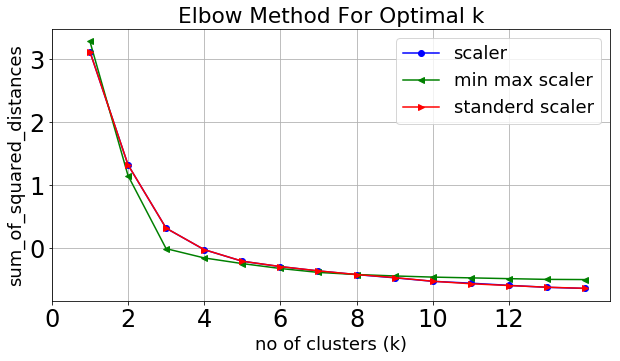

In [58]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams['font.size']=18
plt.grid(True)
plt.plot(K,  scale(Sum_of_squared_distances), 'bo-', label='scaler')
plt.plot(K2, scale(Sum_of_squared_distances_2), 'g<-', label='min max scaler')
plt.plot(K3, scale(Sum_of_squared_distances_3), 'r>-', label='standerd scaler')

plt.xlabel('no of clusters (k)')
#plt.yticks(np.arange(200000, 1888888, step=400000))
plt.xticks(np.arange(0, 14, step=2))
plt.ylabel('sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

plt.legend()
plt.show()

In [59]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from adspy_shared_utilities import plot_labelled_scatter
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D

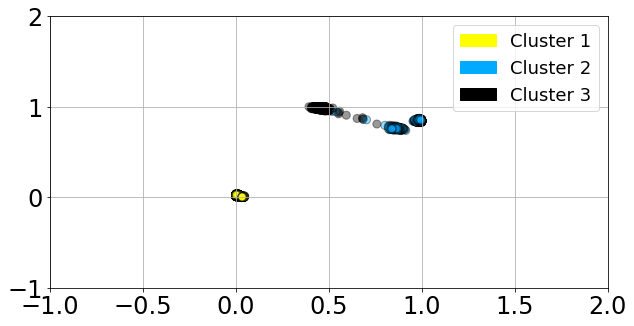

In [60]:
kmeans2 = KMeans(n_clusters = 3, random_state = 0)
kmeans2.fit(scaled_df)
plot_labelled_scatter(scaled_data, kmeans2.labels_,
                      ['Cluster 1', 'Cluster 2','Cluster 3'])

## HCluster Algorithm

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df_h=df.drop(['channelname', "timeofmeasurement"], axis=1)

In [ ]:
## scaling dataset
from sklearn.preprocessing import scale
df_h = scale(df_h)

In [ ]:
z = linkage(df_h, 'complete')

## PCA Calculation

In [61]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [62]:
df_pca = df.copy(deep=True) 

In [63]:
df_pca = df_pca.drop(['direction', "timeofmeasurement"], axis=1)

In [44]:
df_pca.head()

,min,max,avg,skewness,sd,kurtosis,peak-magnitude 1,peak-frequency 1,peak-magnitude 2,peak-frequency 2,peak-magnitude 3,peak-frequency 3,peak-magnitude 4,peak-frequency 4,peak-magnitude 5,peak-frequency 5
0,0.007,0.252,0.105891,0.442092,0.071067,-1.055940,1.465425,1.046832,0.369512,2.102847,0.195093,4.214876,0.090899,3.158861,0.075437,1.120294
1,-1.119,-0.865,-0.992336,-0.239391,0.062193,-0.557088,1.090584,1.046832,0.630911,2.102847,0.289951,3.158861,0.169461,4.214876,0.065148,3.801653
6,0.000,0.246,0.103318,0.438207,0.070745,-1.112039,0.854443,1.038961,0.327344,2.101535,0.180940,4.214876,0.081440,0.968123,0.066603,3.152302
7,-1.124,-0.870,-0.993009,-0.222441,0.062377,-0.365424,0.640819,1.038961,0.581226,2.101535,0.181652,3.152302,0.162496,4.214876,0.072640,0.968123
10,-1.118,-0.870,-0.991100,-0.223253,0.061276,-0.407012,1.103429,1.049587,0.569323,2.107438,0.196212,3.165289,0.174342,4.214876,0.097093,2.033058


In [64]:
## convert the data into numpy array
data_pca = df_pca.values

In [65]:
data_pca_n= scale(data_pca)

In [66]:
data_pca_n.shape

(23405, 16)

In [67]:
pca = PCA().fit(data_pca_n) ## Lets keep all variables

In [68]:
amount_variance_explained = pca.explained_variance_ratio_
print(amount_variance_explained)
print("sum of variance explained:", sum(amount_variance_explained))

[4.71246576e-01 2.37406927e-01 1.02248501e-01 5.04224429e-02
 4.58801239e-02 2.86466597e-02 1.93875644e-02 1.37924705e-02
 9.98978201e-03 7.66530402e-03 6.78634605e-03 3.61030060e-03
 2.43527657e-03 4.69246216e-04 8.80671921e-06 3.67256442e-06]
sum of variance explained: 1.0000000000000002


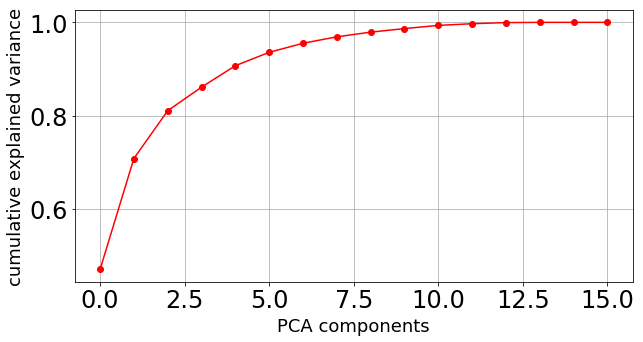

In [69]:
#Explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_),'ro-')
plt.xlabel('PCA components')
plt.ylabel('cumulative explained variance')
plt.show()

In [55]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.44579336 0.69726311 0.79401959 0.84983551 0.89657861 0.93066239
 0.95441777 0.96868186 0.97936518 0.98632151 0.99305363 0.99630927
 0.99890349 0.99998635 0.9999957  1.        ]


In [70]:
# trying 4 variables
pca_4 = PCA(n_components=4).fit(data_pca_n)
X_pca_4 =pca_4.fit_transform(data_pca_n)

print(X_pca_4)

[[-1.90316135 -2.11120383 -0.03343104  0.10589397]
 [-1.92856172 -1.54887529  0.40731867  0.11906159]
 [-2.16493371 -1.55887351  0.30565036 -0.00563086]
 ...
 [ 0.25094385  3.13654241 -4.10530641 -0.02181029]
 [ 0.54717044  3.03083554 -4.03052539 -0.23885016]
 [ 0.17021526  3.20679882 -4.78812283  0.66190484]]


In [59]:
amount_variance_explained_8 = pca_8.explained_variance_ratio_
print(amount_variance_explained_8)
print("sum of variance explained:", sum(amount_variance_explained_8))

[0.44579336 0.25146975 0.09675648 0.05581592 0.0467431  0.03408378
 0.02375539 0.01426409]
sum of variance explained: 0.9686818599894924


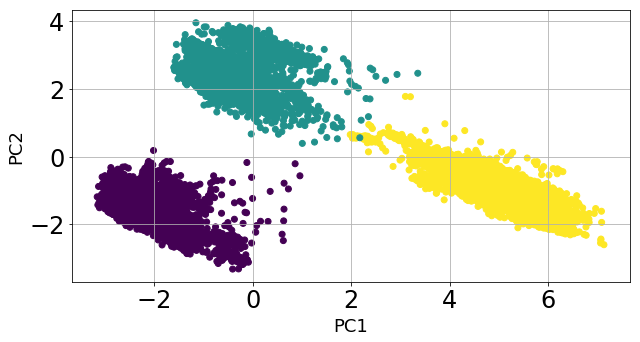

In [71]:
plt.scatter(x=X_pca_4[:,0], y=X_pca_4[:,1], c=kmeans2.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Scatterplot of Canonical Variables for 2 Clusters for 10 variable choice') 
plt.show()

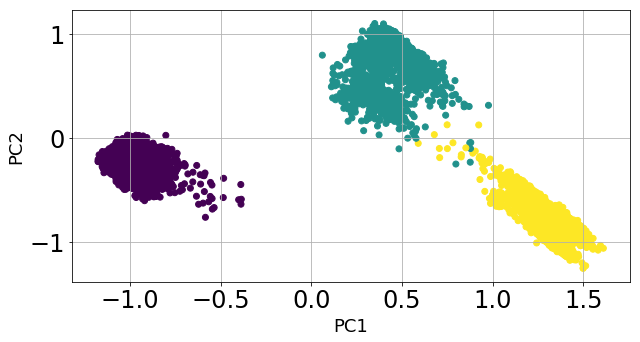

In [73]:
from sklearn.decomposition import PCA
pca_2 = PCA(2) #Return first two canonical variables
plot_columns = pca_2.fit_transform(scaled_data)
# plot 1st canonical v in x axis, 2nd variable on y axis
# color code variables based on cluster assignments (i.e., predicted targets)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=kmeans2.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
#plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show()

In [67]:
plot_columns.shape

(39620, 2)

In [68]:
sum(pca_2.explained_variance_ratio_)

0.8241092105214511

In [82]:
pca_4

PCA(copy=True, n_components=4, whiten=False)

In [69]:
### Scree plot
from sklearn import decomposition
from sklearn.datasets import make_blobs

In [70]:
pca_d = decomposition.PCA(n_components=4)

In [71]:
pc_d = pca_d.fit_transform(data_pca_n)

In [72]:
pd_df = pd.DataFrame(data=pc_d, columns=['PC1', 'PC2','PC3','PC4'])
pd_df.head()

SyntaxError: invalid syntax (<ipython-input-72-3a1c3d49cd54>, line 2)

In [73]:
pca_d.explained_variance_ratio_

array([0.44579336, 0.25146975, 0.09675648, 0.05581592])

In [74]:
pca_df = pd.DataFrame({'var':pca_d.explained_variance_ratio_, 'PC':['PC1', 'PC2','PC3','PC4']})

In [75]:
import seaborn as sns

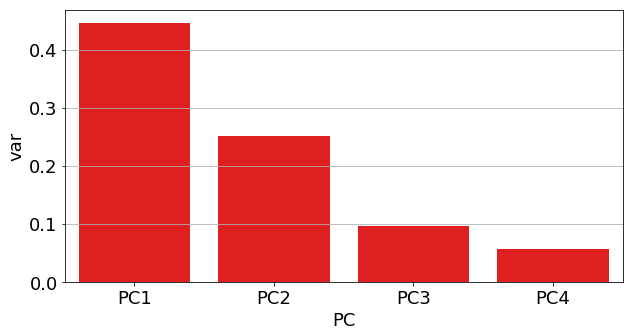

In [76]:
sns.barplot(x='PC', y='var', data=pca_df, color='r')

In [ ]:
##sns.lmplot(x="PC1", y='PC2', data=pca_df, fit_reg=False, hue='Cluster', legend=True, scatter_kws={"s" : 80})

## TSNE Algorithgm

In [ ]:
# Importing Modules
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
# Defining Model
model = TSNE(random_state=0)

In [ ]:
# Fitting Model
transformed = model.fit_transform(scaled_df)

In [ ]:
# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

In [ ]:
plt.scatter(x_axis, y_axis)
plt.show()

## Gaussian Clustering

In [ ]:
from sklearn.mixture import GMM
from matplotlib.patches import Ellipse

gmm = GMM(n_components=3).fit(scaled_data)